In [79]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
from IPython.display import display
import numpy as np
import json
import pickle
import copy
import os
import pandas as pd
import recordlinkage
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import glob
from pathlib import Path
from collections import defaultdict 
import dicom_contour.contour as dcm
from scipy import ndimage, sparse
import medpy.metric as metric
from dicom_contour.contour import get_contour_file,get_roi_names, coord2pixels, cfile2pixels, plot2dcontour, slice_order, get_contour_dict, get_data,  create_image_mask_files, fill_contour, get_data_new, get_contour_files
from Metrics_Analysis import metrics_organ, loop_metrics_organs
from NameMatching import generate_mask, generate_physician_mask, Rename_fuzzy, geometry_relation, dir_similirity, angle_3axl, loop_patients_geoStat, process_geo_relation, check_stdName
from NameMatching import df_stat
from qa_analysis import loop_test_patients
from rename_file import rename_ct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
class IndexTracker(object):
    def __init__(self, ax, X,fig,bmin,bmax):
        self.ax = ax
        ax.set_title('use scroll wheel to navigate images')

        self.X = X
        self.fig = fig
        self.slices, row, cols = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[self.ind,:,:],cmap='gray',vmin=bmin, vmax=bmax)
        fig.colorbar(self.im, ax=self.ax )
      #  self.im.colorbar()
        self.update()

    def onscroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[self.ind,:, :])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [74]:
standard_list =["Tongue_Base", "Tongue_Oral", "Trachea","Bone","SpinalCord","Scar","Retinas","Retina_R","Retina_L","Lens_R","Lens_L","Parotid_R",
       "Parotid_L","Parotids","OpticNrv_R","OpticNrv_L", "OpticNrv","OpticChiasm", "Musc_Constrict_S", "Musc_Constrict_M","Musc_Constrict_I","Musc_Constrict",
       "Lungs", "Lips","Larnx_SG","Larnyx","Glnd_Submands","Glnd_Submand_L","Glnd_Submand_R", "Eyes", "Eye_R", "Eye_L","Esophagus",
      "Ear_Internal_R", "Ear_Internal_L","Cochlea_R","Cochlea_L","Cochlea","Brainstem","Brain","Brachialplexs","BrachialPlex_R",
      "BrachialPlex_L", "Bone_Mandible","Body","Mouth_Floor",'Cavity_Oral','Pitutary','Thyroid','Carotid','Carotid_L','Carotid_R',
               "Arytenoid", "Arytenoid_L", "Arytenoid_R", "Ethmoid", "Occipital","Parietal_L","Parietal_R","Parietal","Sphenoid","Temporal",
               "Temporal_L","Temporal_R","Cavity_Nasal","Cerebrum","Cerebrum_L","Cerebrum_R","Glnd_Lacrimal","Glnd_Lacrimal_L","Glnd_Lacrimal_R",
               "Glottis", "Nasopharynx"]




In [82]:
parent_path = 'HN_v2'
geo_relation = loop_patients_geoStat(parent_path, standard_list)

work on patient HN_v2\HN20039-01
work on RS structure  Physician +++++++++++++++++++++++++++
BODY  -->  Body  score is  100
.CTV60  is  a target structure
.PTV54_AA  is  a target structure
.PTV60_AA  is  a target structure
.PTV70_AA  is  a target structure
Brach Plexus,L  -->  Brachialplexs  score is  74
Brain  -->  Brain  score is  100
Brain Stem  -->  Brainstem  score is  95
Cochlea Rt  -->  Cochlea_R  score is  84
Cochlea_L  -->  Cochlea_L  score is  100
Epiglottis  -->  Glottis  score is  82
Esophagus  -->  Esophagus  score is  100
Larynx  -->  Larnyx  score is  83
Lens, Lt  -->  Lens_L  score is  71
Lens, Rt  -->  Lens_R  score is  71
Mandible  -->  Bone_Mandible  score is  76
Parotid, Rt  -->  Parotid_R  score is  80
Musc_Constrict inf  -->  Musc_Constrict_I  score is  88
Musc_Constrict mid  -->  Musc_Constrict_M  score is  88
Musc_Constrict sup  -->  Musc_Constrict_S  score is  88
Spinal Cord  -->  SpinalCord  score is  95
.GTV70p  is  a target structure
.GTVn  is  a target stru

C:\Users\ddu\MedicalMind\NameMatching.py:221: RuntimeWarning: invalid value encountered in true_divide
  return result


geometry relation start to work on organs BODY  and  Parotid_Rt
geometry relation start to work on organs BODY  and  Parotid_Lt
geometry relation start to work on organs BODY  and  mandible
geometry relation start to work on organs BODY  and  Lips
geometry relation start to work on organs BODY  and  Larynx
geometry relation start to work on organs BODY  and  Esophagus
geometry relation start to work on organs BODY  and  Cochlea_Rt
geometry relation start to work on organs BODY  and  Cochlea_Lt
geometry relation start to work on organs BODY  and  Brainstem
geometry relation start to work on organs BODY  and  Brain
geometry relation start to work on organs Parotid_Rt  and  BODY
geometry relation start to work on organs Parotid_Rt  and  Parotid_Rt
geometry relation start to work on organs Parotid_Rt  and  Parotid_Lt
geometry relation start to work on organs Parotid_Rt  and  mandible
geometry relation start to work on organs Parotid_Rt  and  Lips
geometry relation start to work on organs P

ref_LR is [-0.00698219 -0.00838363 -0.99994048]
ref_SI is [ 0.75956505 -0.64794201  0.05685153]
geometry relation start to work on organs Brainstem  and  Brainstem
geometry relation start to work on organs Brainstem  and  Cochlea_L
geometry relation start to work on organs Brainstem  and  Cochlea_R
geometry relation start to work on organs Brainstem  and  Epiglottis
geometry relation start to work on organs Brainstem  and  Esophagus
geometry relation start to work on organs Brainstem  and  Larynx
geometry relation start to work on organs Brainstem  and  Lens_L
geometry relation start to work on organs Brainstem  and  Lens_R
geometry relation start to work on organs Brainstem  and  Lips
geometry relation start to work on organs Brainstem  and  Mandible
geometry relation start to work on organs Brainstem  and  OpticChiasm
geometry relation start to work on organs Brainstem  and  Parotid_L
geometry relation start to work on organs Brainstem  and  Parotid_R
geometry relation start to work 

geometry relation start to work on organs Larynx  and  Cochlea_R
geometry relation start to work on organs Larynx  and  Epiglottis
geometry relation start to work on organs Larynx  and  Esophagus
geometry relation start to work on organs Larynx  and  Larynx
geometry relation start to work on organs Larynx  and  Lens_L
geometry relation start to work on organs Larynx  and  Lens_R
geometry relation start to work on organs Larynx  and  Lips
geometry relation start to work on organs Larynx  and  Mandible
geometry relation start to work on organs Larynx  and  OpticChiasm
geometry relation start to work on organs Larynx  and  Parotid_L
geometry relation start to work on organs Larynx  and  Parotid_R
geometry relation start to work on organs Larynx  and  Musc_Constrictinf
geometry relation start to work on organs Larynx  and  Musc_Constrictmid
geometry relation start to work on organs Larynx  and  Musc_Constrictsup
geometry relation start to work on organs Larynx  and  Glnd_Submand__L
geometr

geometry relation start to work on organs OpticChiasm  and  Parotid_L
geometry relation start to work on organs OpticChiasm  and  Parotid_R
geometry relation start to work on organs OpticChiasm  and  Musc_Constrictinf
geometry relation start to work on organs OpticChiasm  and  Musc_Constrictmid
geometry relation start to work on organs OpticChiasm  and  Musc_Constrictsup
geometry relation start to work on organs OpticChiasm  and  Glnd_Submand__L
geometry relation start to work on organs OpticChiasm  and  Glnd_Submand__R
geometry relation start to work on organs OpticChiasm  and  SpinalCord
geometry relation start to work on organs OpticChiasm  and  Brain
geometry relation start to work on organs OpticChiasm  and  BrachialPlexus_R
geometry relation start to work on organs OpticChiasm  and  BODY
geometry relation start to work on organs OpticChiasm  and  .ptv/brachial pl
geometry relation start to work on organs Parotid_L  and  Brainstem
geometry relation start to work on organs Parotid_

geometry relation start to work on organs Musc_Constrictsup  and  Lips
geometry relation start to work on organs Musc_Constrictsup  and  Mandible
geometry relation start to work on organs Musc_Constrictsup  and  OpticChiasm
geometry relation start to work on organs Musc_Constrictsup  and  Parotid_L
geometry relation start to work on organs Musc_Constrictsup  and  Parotid_R
geometry relation start to work on organs Musc_Constrictsup  and  Musc_Constrictinf
geometry relation start to work on organs Musc_Constrictsup  and  Musc_Constrictmid
geometry relation start to work on organs Musc_Constrictsup  and  Musc_Constrictsup
geometry relation start to work on organs Musc_Constrictsup  and  Glnd_Submand__L
geometry relation start to work on organs Musc_Constrictsup  and  Glnd_Submand__R
geometry relation start to work on organs Musc_Constrictsup  and  SpinalCord
geometry relation start to work on organs Musc_Constrictsup  and  Brain
geometry relation start to work on organs Musc_Constrictsup

geometry relation start to work on organs BrachialPlexus_R  and  Lens_L
geometry relation start to work on organs BrachialPlexus_R  and  Lens_R
geometry relation start to work on organs BrachialPlexus_R  and  Lips
geometry relation start to work on organs BrachialPlexus_R  and  Mandible
geometry relation start to work on organs BrachialPlexus_R  and  OpticChiasm
geometry relation start to work on organs BrachialPlexus_R  and  Parotid_L
geometry relation start to work on organs BrachialPlexus_R  and  Parotid_R
geometry relation start to work on organs BrachialPlexus_R  and  Musc_Constrictinf
geometry relation start to work on organs BrachialPlexus_R  and  Musc_Constrictmid
geometry relation start to work on organs BrachialPlexus_R  and  Musc_Constrictsup
geometry relation start to work on organs BrachialPlexus_R  and  Glnd_Submand__L
geometry relation start to work on organs BrachialPlexus_R  and  Glnd_Submand__R
geometry relation start to work on organs BrachialPlexus_R  and  SpinalCor

C:\Users\ddu\Anaconda3\envs\MedicalMind\lib\site-packages\dicom_contour\contour.py:79: UserWarning: There are more than 3 contour files, double check!
  if n >3 : warnings.warn("There are more than 3 contour files, double check!")


work on RS structure  Physician +++++++++++++++++++++++++++
work on RS structure  Physician +++++++++++++++++++++++++++
.CTV54n  is  a target structure
.CTV60  is  a target structure
.CTVbuccal  is  a target structure
.PTV54Gy  is  a target structure
.PTV54Gy_Plan  is  a target structure
.PTV60Gy  is  a target structure
BODY  -->  Body  score is  100
Brain  -->  Brain  score is  100
Brainstem  -->  Brainstem  score is  100
Cochlea_L  -->  Cochlea_L  score is  100
Cochlea_R  -->  Cochlea_R  score is  100
Epiglottis  -->  Glottis  score is  82
Esophagus  -->  Esophagus  score is  100
Larynx  -->  Larnyx  score is  83
Lips  -->  Lips  score is  100
Mandible  -->  Bone_Mandible  score is  76
Parotid, Lt  -->  Parotid_L  score is  80
Parotid, Rt  -->  Parotid_R  score is  80
Musc_Constrict inf  -->  Musc_Constrict_I  score is  88
Musc_Constrict mid  -->  Musc_Constrict_M  score is  88
Musc_Constrict sup  -->  Musc_Constrict_S  score is  88
Spinal Cord  -->  SpinalCord  score is  95
ref_LR i

geometry relation start to work on organs Esophagus  and  Parotid, Lt
geometry relation start to work on organs Esophagus  and  Parotid, Rt
geometry relation start to work on organs Esophagus  and  Musc_Constrict inf
geometry relation start to work on organs Esophagus  and  Musc_Constrict mid
geometry relation start to work on organs Esophagus  and  Musc_Constrict sup
geometry relation start to work on organs Esophagus  and  Spinal Cord
geometry relation start to work on organs Larynx  and  BODY
geometry relation start to work on organs Larynx  and  Brain
geometry relation start to work on organs Larynx  and  Brainstem
geometry relation start to work on organs Larynx  and  Cochlea_L
geometry relation start to work on organs Larynx  and  Cochlea_R
geometry relation start to work on organs Larynx  and  Epiglottis
geometry relation start to work on organs Larynx  and  Esophagus
geometry relation start to work on organs Larynx  and  Larynx
geometry relation start to work on organs Larynx  

geometry relation start to work on organs Musc_Constrict mid  and  Musc_Constrict sup
geometry relation start to work on organs Musc_Constrict mid  and  Spinal Cord
geometry relation start to work on organs Musc_Constrict sup  and  BODY
geometry relation start to work on organs Musc_Constrict sup  and  Brain
geometry relation start to work on organs Musc_Constrict sup  and  Brainstem
geometry relation start to work on organs Musc_Constrict sup  and  Cochlea_L
geometry relation start to work on organs Musc_Constrict sup  and  Cochlea_R
geometry relation start to work on organs Musc_Constrict sup  and  Epiglottis
geometry relation start to work on organs Musc_Constrict sup  and  Esophagus
geometry relation start to work on organs Musc_Constrict sup  and  Larynx
geometry relation start to work on organs Musc_Constrict sup  and  Lips
geometry relation start to work on organs Musc_Constrict sup  and  Mandible
geometry relation start to work on organs Musc_Constrict sup  and  Parotid, Lt
geo

geometry relation start to work on organs BrachialPlexus_L  and  Lens_L
geometry relation start to work on organs BrachialPlexus_L  and  Lens_R
geometry relation start to work on organs BrachialPlexus_L  and  Mandible
geometry relation start to work on organs BrachialPlexus_L  and  OpticNerve_L
geometry relation start to work on organs BrachialPlexus_L  and  OpticNerve_R
geometry relation start to work on organs BrachialPlexus_L  and  Parotid_L
geometry relation start to work on organs BrachialPlexus_L  and  Parotid_R
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrict inf
geometry relation start to work on organs BrachialPlexus_L  and  Musc_Constrict mid
geometry relation start to work on organs BrachialPlexus_L  and  Glnd_Submand__L
geometry relation start to work on organs BrachialPlexus_L  and  Glnd_Submand__R
geometry relation start to work on organs BrachialPlexus_L  and  SpinalCord
geometry relation start to work on organs BrachialPlexus_R  and  Optic

geometry relation start to work on organs TemporalLobe_R  and  Musc_Constrict mid
geometry relation start to work on organs TemporalLobe_R  and  Glnd_Submand__L
geometry relation start to work on organs TemporalLobe_R  and  Glnd_Submand__R
geometry relation start to work on organs TemporalLobe_R  and  SpinalCord
geometry relation start to work on organs TemporalLobe_L  and  OpticChiasm
geometry relation start to work on organs TemporalLobe_L  and  BrachialPlexus_L
geometry relation start to work on organs TemporalLobe_L  and  BrachialPlexus_R
geometry relation start to work on organs TemporalLobe_L  and  Eye_R
geometry relation start to work on organs TemporalLobe_L  and  Eye_L
geometry relation start to work on organs TemporalLobe_L  and  TemporalLobe_R
geometry relation start to work on organs TemporalLobe_L  and  TemporalLobe_L
geometry relation start to work on organs TemporalLobe_L  and  Subglottis
geometry relation start to work on organs TemporalLobe_L  and  Cochlea_R
geometry r

geometry relation start to work on organs BODY  and  Eye_R
geometry relation start to work on organs BODY  and  Eye_L
geometry relation start to work on organs BODY  and  TemporalLobe_R
geometry relation start to work on organs BODY  and  TemporalLobe_L
geometry relation start to work on organs BODY  and  Subglottis
geometry relation start to work on organs BODY  and  Cochlea_R
geometry relation start to work on organs BODY  and  Cochlea_L
geometry relation start to work on organs BODY  and  BODY
geometry relation start to work on organs BODY  and  BrachialPlexus
geometry relation start to work on organs BODY  and  BrainStem
geometry relation start to work on organs BODY  and  Esophagus
geometry relation start to work on organs BODY  and  LarynxGSL
geometry relation start to work on organs BODY  and  Lens_L
geometry relation start to work on organs BODY  and  Lens_R
geometry relation start to work on organs BODY  and  Mandible
geometry relation start to work on organs BODY  and  OpticN

geometry relation start to work on organs LarynxGSL  and  Esophagus
geometry relation start to work on organs LarynxGSL  and  LarynxGSL
geometry relation start to work on organs LarynxGSL  and  Lens_L
geometry relation start to work on organs LarynxGSL  and  Lens_R
geometry relation start to work on organs LarynxGSL  and  Mandible
geometry relation start to work on organs LarynxGSL  and  OpticNerve_L
geometry relation start to work on organs LarynxGSL  and  OpticNerve_R
geometry relation start to work on organs LarynxGSL  and  Parotid_L
geometry relation start to work on organs LarynxGSL  and  Parotid_R
geometry relation start to work on organs LarynxGSL  and  Musc_Constrict inf
geometry relation start to work on organs LarynxGSL  and  Musc_Constrict mid
geometry relation start to work on organs LarynxGSL  and  Glnd_Submand__L
geometry relation start to work on organs LarynxGSL  and  Glnd_Submand__R
geometry relation start to work on organs LarynxGSL  and  SpinalCord
geometry relation 

geometry relation start to work on organs OpticNerve_L  and  Glnd_Submand__R
geometry relation start to work on organs OpticNerve_L  and  SpinalCord
geometry relation start to work on organs OpticNerve_R  and  OpticChiasm
geometry relation start to work on organs OpticNerve_R  and  BrachialPlexus_L
geometry relation start to work on organs OpticNerve_R  and  BrachialPlexus_R
geometry relation start to work on organs OpticNerve_R  and  Eye_R
geometry relation start to work on organs OpticNerve_R  and  Eye_L
geometry relation start to work on organs OpticNerve_R  and  TemporalLobe_R
geometry relation start to work on organs OpticNerve_R  and  TemporalLobe_L
geometry relation start to work on organs OpticNerve_R  and  Subglottis
geometry relation start to work on organs OpticNerve_R  and  Cochlea_R
geometry relation start to work on organs OpticNerve_R  and  Cochlea_L
geometry relation start to work on organs OpticNerve_R  and  BODY
geometry relation start to work on organs OpticNerve_R  

geometry relation start to work on organs Musc_Constrict mid  and  Eye_R
geometry relation start to work on organs Musc_Constrict mid  and  Eye_L
geometry relation start to work on organs Musc_Constrict mid  and  TemporalLobe_R
geometry relation start to work on organs Musc_Constrict mid  and  TemporalLobe_L
geometry relation start to work on organs Musc_Constrict mid  and  Subglottis
geometry relation start to work on organs Musc_Constrict mid  and  Cochlea_R
geometry relation start to work on organs Musc_Constrict mid  and  Cochlea_L
geometry relation start to work on organs Musc_Constrict mid  and  BODY
geometry relation start to work on organs Musc_Constrict mid  and  BrachialPlexus
geometry relation start to work on organs Musc_Constrict mid  and  BrainStem
geometry relation start to work on organs Musc_Constrict mid  and  Esophagus
geometry relation start to work on organs Musc_Constrict mid  and  LarynxGSL
geometry relation start to work on organs Musc_Constrict mid  and  Lens_L

ref_LR is [ 0.0055949   0.08664889 -0.9962232 ]
ref_SI is [0 0 0]
work on patient HN_v2\HN20039-07
work on RS structure  Physician +++++++++++++++++++++++++++
BODY  -->  Body  score is  100
.CTV54p  is  a target structure
.PTV54  is  a target structure
.PTV66n  is  a target structure
.PTV54-Lt  is  a target structure
.PTV54-plan  is  a target structure
.PTV54-Rt4  is  a target structure
.PTV54-Rt3  is  a target structure
.PTV60-plan  is  a target structure
.PTV66-plan  is  a target structure
BrachPlexus_Rt  -->  BrachialPlex_R  score is  79
Epiglottis  -->  Glottis  score is  82
Larynx  -->  Larnyx  score is  83
Lens_Lt  -->  Lens_L  score is  92
Lens_Rt  -->  Lens_R  score is  92
mandible  -->  Bone_Mandible  score is  76
Parotid_Lt  -->  Parotid_L  score is  95
.PTV skin  is  a target structure
.PTV scar  is  a target structure
.preopGTV  is  a target structure
.CTV66n-Rt  is  a target structure
.PTV54-Rt1  is  a target structure
.PTV54-Rt2  is  a target structure
.PTV60-Rt1  is  a t

geometry relation start to work on organs BODY  and  Brain Stem
geometry relation start to work on organs BODY  and  Brach Plexus,R
geometry relation start to work on organs BODY  and  BODY
geometry relation start to work on organs BODY  and  Esophagus
geometry relation start to work on organs BODY  and  Larynx
geometry relation start to work on organs BODY  and  Lens, Lt
geometry relation start to work on organs BODY  and  Lens, Rt
geometry relation start to work on organs BODY  and  Lips
geometry relation start to work on organs BODY  and  Mandible
geometry relation start to work on organs BODY  and  Parotid, Lt
geometry relation start to work on organs BODY  and  Parotid, Rt
geometry relation start to work on organs BODY  and  Musc_Constrict inf
geometry relation start to work on organs BODY  and  Musc_Constrict mid
geometry relation start to work on organs BODY  and  Musc_Constrict sup
geometry relation start to work on organs BODY  and  Spinal Cord
geometry relation start to work 

geometry relation start to work on organs Parotid, Lt  and  Parotid, Rt
geometry relation start to work on organs Parotid, Lt  and  Musc_Constrict inf
geometry relation start to work on organs Parotid, Lt  and  Musc_Constrict mid
geometry relation start to work on organs Parotid, Lt  and  Musc_Constrict sup
geometry relation start to work on organs Parotid, Lt  and  Spinal Cord
geometry relation start to work on organs Parotid, Rt  and  Epiglottis
geometry relation start to work on organs Parotid, Rt  and  Brain Stem
geometry relation start to work on organs Parotid, Rt  and  Brach Plexus,R
geometry relation start to work on organs Parotid, Rt  and  BODY
geometry relation start to work on organs Parotid, Rt  and  Esophagus
geometry relation start to work on organs Parotid, Rt  and  Larynx
geometry relation start to work on organs Parotid, Rt  and  Lens, Lt
geometry relation start to work on organs Parotid, Rt  and  Lens, Rt
geometry relation start to work on organs Parotid, Rt  and  Li

geometry relation start to work on organs esophagus  and  Cochlea_R
geometry relation start to work on organs esophagus  and  Epiglottis
geometry relation start to work on organs esophagus  and  Eye_L
geometry relation start to work on organs esophagus  and  Eye_R
geometry relation start to work on organs esophagus  and  LarynxGSL
geometry relation start to work on organs esophagus  and  Lens_L
geometry relation start to work on organs esophagus  and  Lens_R
geometry relation start to work on organs esophagus  and  Lips
geometry relation start to work on organs esophagus  and  Mandible
geometry relation start to work on organs esophagus  and  OpticNerve_L
geometry relation start to work on organs esophagus  and  OpticNerve_R
geometry relation start to work on organs esophagus  and  Parotid_L
geometry relation start to work on organs esophagus  and  Parotid_R
geometry relation start to work on organs esophagus  and  Musc_Constrictinf
geometry relation start to work on organs esophagus  

geometry relation start to work on organs Epiglottis  and  Lens_R
geometry relation start to work on organs Epiglottis  and  Lips
geometry relation start to work on organs Epiglottis  and  Mandible
geometry relation start to work on organs Epiglottis  and  OpticNerve_L
geometry relation start to work on organs Epiglottis  and  OpticNerve_R
geometry relation start to work on organs Epiglottis  and  Parotid_L
geometry relation start to work on organs Epiglottis  and  Parotid_R
geometry relation start to work on organs Epiglottis  and  Musc_Constrictinf
geometry relation start to work on organs Epiglottis  and  Musc_Constrictmid
geometry relation start to work on organs Epiglottis  and  Musc_ConstrictSup
geometry relation start to work on organs Epiglottis  and  SpinalCord
geometry relation start to work on organs Epiglottis  and  TemporalLobe_L
geometry relation start to work on organs Epiglottis  and  TemporalLobe_R
geometry relation start to work on organs Eye_L  and  esophagus
geometr

geometry relation start to work on organs Lens_R  and  Musc_ConstrictSup
geometry relation start to work on organs Lens_R  and  SpinalCord
geometry relation start to work on organs Lens_R  and  TemporalLobe_L
geometry relation start to work on organs Lens_R  and  TemporalLobe_R
geometry relation start to work on organs Lips  and  esophagus
geometry relation start to work on organs Lips  and  BODY
geometry relation start to work on organs Lips  and  BrainStem
geometry relation start to work on organs Lips  and  Cochlea_L
geometry relation start to work on organs Lips  and  Cochlea_R
geometry relation start to work on organs Lips  and  Epiglottis
geometry relation start to work on organs Lips  and  Eye_L
geometry relation start to work on organs Lips  and  Eye_R
geometry relation start to work on organs Lips  and  LarynxGSL
geometry relation start to work on organs Lips  and  Lens_L
geometry relation start to work on organs Lips  and  Lens_R
geometry relation start to work on organs Lips

geometry relation start to work on organs Parotid_R  and  BODY
geometry relation start to work on organs Parotid_R  and  BrainStem
geometry relation start to work on organs Parotid_R  and  Cochlea_L
geometry relation start to work on organs Parotid_R  and  Cochlea_R
geometry relation start to work on organs Parotid_R  and  Epiglottis
geometry relation start to work on organs Parotid_R  and  Eye_L
geometry relation start to work on organs Parotid_R  and  Eye_R
geometry relation start to work on organs Parotid_R  and  LarynxGSL
geometry relation start to work on organs Parotid_R  and  Lens_L
geometry relation start to work on organs Parotid_R  and  Lens_R
geometry relation start to work on organs Parotid_R  and  Lips
geometry relation start to work on organs Parotid_R  and  Mandible
geometry relation start to work on organs Parotid_R  and  OpticNerve_L
geometry relation start to work on organs Parotid_R  and  OpticNerve_R
geometry relation start to work on organs Parotid_R  and  Parotid_

geometry relation start to work on organs SpinalCord  and  SpinalCord
geometry relation start to work on organs SpinalCord  and  TemporalLobe_L
geometry relation start to work on organs SpinalCord  and  TemporalLobe_R
geometry relation start to work on organs TemporalLobe_L  and  esophagus
geometry relation start to work on organs TemporalLobe_L  and  BODY
geometry relation start to work on organs TemporalLobe_L  and  BrainStem
geometry relation start to work on organs TemporalLobe_L  and  Cochlea_L
geometry relation start to work on organs TemporalLobe_L  and  Cochlea_R
geometry relation start to work on organs TemporalLobe_L  and  Epiglottis
geometry relation start to work on organs TemporalLobe_L  and  Eye_L
geometry relation start to work on organs TemporalLobe_L  and  Eye_R
geometry relation start to work on organs TemporalLobe_L  and  LarynxGSL
geometry relation start to work on organs TemporalLobe_L  and  Lens_L
geometry relation start to work on organs TemporalLobe_L  and  Lens

geometry relation start to work on organs Brain  and  Musc_Constrictsup
geometry relation start to work on organs Brain  and  Glnd_Submand__R
geometry relation start to work on organs Brain  and  SpinalCord
geometry relation start to work on organs Brainstem  and  BODY
geometry relation start to work on organs Brainstem  and  BrachialPlexus_L
geometry relation start to work on organs Brainstem  and  Brain
geometry relation start to work on organs Brainstem  and  Brainstem
geometry relation start to work on organs Brainstem  and  Epiglottis
geometry relation start to work on organs Brainstem  and  Esophagus
geometry relation start to work on organs Brainstem  and  Larynx
geometry relation start to work on organs Brainstem  and  Lips
geometry relation start to work on organs Brainstem  and  Mandible
geometry relation start to work on organs Brainstem  and  Parotid_L
geometry relation start to work on organs Brainstem  and  Parotid_R
geometry relation start to work on organs Brainstem  an

geometry relation start to work on organs Parotid_R  and  Larynx
geometry relation start to work on organs Parotid_R  and  Lips
geometry relation start to work on organs Parotid_R  and  Mandible
geometry relation start to work on organs Parotid_R  and  Parotid_L
geometry relation start to work on organs Parotid_R  and  Parotid_R
geometry relation start to work on organs Parotid_R  and  Musc_Constrictinf
geometry relation start to work on organs Parotid_R  and  Musc_Constrictmid
geometry relation start to work on organs Parotid_R  and  Musc_Constrictsup
geometry relation start to work on organs Parotid_R  and  Glnd_Submand__R
geometry relation start to work on organs Parotid_R  and  SpinalCord
geometry relation start to work on organs Musc_Constrictinf  and  BODY
geometry relation start to work on organs Musc_Constrictinf  and  BrachialPlexus_L
geometry relation start to work on organs Musc_Constrictinf  and  Brain
geometry relation start to work on organs Musc_Constrictinf  and  Brains

geometry relation start to work on organs BODY  and  SpinalCord
geometry relation start to work on organs BODY  and  Glnd_Submand__L
geometry relation start to work on organs BODY  and  Musc_Constrictsup
geometry relation start to work on organs BODY  and  Musc_Constrictmid
geometry relation start to work on organs BODY  and  Musc_Constrictinf
geometry relation start to work on organs BODY  and  Parotid_R
geometry relation start to work on organs BODY  and  Parotid_L
geometry relation start to work on organs BODY  and  Mandible
geometry relation start to work on organs BODY  and  Lips
geometry relation start to work on organs BODY  and  Larynx
geometry relation start to work on organs BODY  and  Esophagus
geometry relation start to work on organs BODY  and  Epiglottis
geometry relation start to work on organs BODY  and  Cochlea_R
geometry relation start to work on organs BODY  and  Cochlea_L
geometry relation start to work on organs BODY  and  Brainstem
geometry relation start to work 

geometry relation start to work on organs Parotid_R  and  Musc_Constrictmid
geometry relation start to work on organs Parotid_R  and  Musc_Constrictinf
geometry relation start to work on organs Parotid_R  and  Parotid_R
geometry relation start to work on organs Parotid_R  and  Parotid_L
geometry relation start to work on organs Parotid_R  and  Mandible
geometry relation start to work on organs Parotid_R  and  Lips
geometry relation start to work on organs Parotid_R  and  Larynx
geometry relation start to work on organs Parotid_R  and  Esophagus
geometry relation start to work on organs Parotid_R  and  Epiglottis
geometry relation start to work on organs Parotid_R  and  Cochlea_R
geometry relation start to work on organs Parotid_R  and  Cochlea_L
geometry relation start to work on organs Parotid_R  and  Brainstem
geometry relation start to work on organs Parotid_R  and  BrachialPlexus_R
geometry relation start to work on organs Parotid_R  and  BrachialPlexus_L
geometry relation start to

geometry relation start to work on organs Epiglottis  and  BrachialPlexus_R
geometry relation start to work on organs Epiglottis  and  BrachialPlexus_L
geometry relation start to work on organs Cochlea_R  and  BODY
geometry relation start to work on organs Cochlea_R  and  SpinalCord
geometry relation start to work on organs Cochlea_R  and  Glnd_Submand__L
geometry relation start to work on organs Cochlea_R  and  Musc_Constrictsup
geometry relation start to work on organs Cochlea_R  and  Musc_Constrictmid
geometry relation start to work on organs Cochlea_R  and  Musc_Constrictinf
geometry relation start to work on organs Cochlea_R  and  Parotid_R
geometry relation start to work on organs Cochlea_R  and  Parotid_L
geometry relation start to work on organs Cochlea_R  and  Mandible
geometry relation start to work on organs Cochlea_R  and  Lips
geometry relation start to work on organs Cochlea_R  and  Larynx
geometry relation start to work on organs Cochlea_R  and  Esophagus
geometry relati

ref_LR is [-0.00973852 -0.00185799 -0.99995085]
ref_SI is [ 0.98770311 -0.11314661 -0.1078907 ]
geometry relation start to work on organs Esophagus_S  and  Esophagus_S
geometry relation start to work on organs Esophagus_S  and  Epiglottis
geometry relation start to work on organs Esophagus_S  and  BrainStem
geometry relation start to work on organs Esophagus_S  and  Brain
geometry relation start to work on organs Esophagus_S  and  BrachialPlexus_R
geometry relation start to work on organs Esophagus_S  and  BrachialPlexus_L
geometry relation start to work on organs Esophagus_S  and  Larynx_SG
geometry relation start to work on organs Esophagus_S  and  Lips
geometry relation start to work on organs Esophagus_S  and  Bone_Mandible
geometry relation start to work on organs Esophagus_S  and  OpticChiasm
geometry relation start to work on organs Esophagus_S  and  OpticNrv_L
geometry relation start to work on organs Esophagus_S  and  OpticNrv_R
geometry relation start to work on organs Esopha

geometry relation start to work on organs BrachialPlexus_R  and  Pharynx
geometry relation start to work on organs BrachialPlexus_L  and  Esophagus_S
geometry relation start to work on organs BrachialPlexus_L  and  Epiglottis
geometry relation start to work on organs BrachialPlexus_L  and  BrainStem
geometry relation start to work on organs BrachialPlexus_L  and  Brain
geometry relation start to work on organs BrachialPlexus_L  and  BrachialPlexus_R
geometry relation start to work on organs BrachialPlexus_L  and  BrachialPlexus_L
geometry relation start to work on organs BrachialPlexus_L  and  Larynx_SG
geometry relation start to work on organs BrachialPlexus_L  and  Lips
geometry relation start to work on organs BrachialPlexus_L  and  Bone_Mandible
geometry relation start to work on organs BrachialPlexus_L  and  OpticChiasm
geometry relation start to work on organs BrachialPlexus_L  and  OpticNrv_L
geometry relation start to work on organs BrachialPlexus_L  and  OpticNrv_R
geometry re

geometry relation start to work on organs OpticChiasm  and  Lobe_Temporal_R
geometry relation start to work on organs OpticChiasm  and  Pharynx
geometry relation start to work on organs OpticNrv_L  and  Esophagus_S
geometry relation start to work on organs OpticNrv_L  and  Epiglottis
geometry relation start to work on organs OpticNrv_L  and  BrainStem
geometry relation start to work on organs OpticNrv_L  and  Brain
geometry relation start to work on organs OpticNrv_L  and  BrachialPlexus_R
geometry relation start to work on organs OpticNrv_L  and  BrachialPlexus_L
geometry relation start to work on organs OpticNrv_L  and  Larynx_SG
geometry relation start to work on organs OpticNrv_L  and  Lips
geometry relation start to work on organs OpticNrv_L  and  Bone_Mandible
geometry relation start to work on organs OpticNrv_L  and  OpticChiasm
geometry relation start to work on organs OpticNrv_L  and  OpticNrv_L
geometry relation start to work on organs OpticNrv_L  and  OpticNrv_R
geometry rel

geometry relation start to work on organs Parotid_R  and  Lobe_Temporal_R
geometry relation start to work on organs Parotid_R  and  Pharynx
geometry relation start to work on organs Musc_Constrictinf  and  Esophagus_S
geometry relation start to work on organs Musc_Constrictinf  and  Epiglottis
geometry relation start to work on organs Musc_Constrictinf  and  BrainStem
geometry relation start to work on organs Musc_Constrictinf  and  Brain
geometry relation start to work on organs Musc_Constrictinf  and  BrachialPlexus_R
geometry relation start to work on organs Musc_Constrictinf  and  BrachialPlexus_L
geometry relation start to work on organs Musc_Constrictinf  and  Larynx_SG
geometry relation start to work on organs Musc_Constrictinf  and  Lips
geometry relation start to work on organs Musc_Constrictinf  and  Bone_Mandible
geometry relation start to work on organs Musc_Constrictinf  and  OpticChiasm
geometry relation start to work on organs Musc_Constrictinf  and  OpticNrv_L
geometry 

geometry relation start to work on organs SpinalCord  and  Parotid_L
geometry relation start to work on organs SpinalCord  and  Parotid_R
geometry relation start to work on organs SpinalCord  and  Musc_Constrictinf
geometry relation start to work on organs SpinalCord  and  Musc_Constrictmid
geometry relation start to work on organs SpinalCord  and  Musc_Constrictsup
geometry relation start to work on organs SpinalCord  and  Glnd_Submand_R
geometry relation start to work on organs SpinalCord  and  SpinalCord
geometry relation start to work on organs SpinalCord  and  Lobe_Temporal_L
geometry relation start to work on organs SpinalCord  and  Lobe_Temporal_R
geometry relation start to work on organs SpinalCord  and  Pharynx
geometry relation start to work on organs Lobe_Temporal_L  and  Esophagus_S
geometry relation start to work on organs Lobe_Temporal_L  and  Epiglottis
geometry relation start to work on organs Lobe_Temporal_L  and  BrainStem
geometry relation start to work on organs Lob

geometry relation start to work on organs Esophagus  and  Parotid_L
geometry relation start to work on organs Esophagus  and  Parotid_R
geometry relation start to work on organs Esophagus  and  SpinalCord
geometry relation start to work on organs Esophagus  and  BODY
geometry relation start to work on organs Esophagus  and  Glnd_Submand__R
geometry relation start to work on organs Esophagus  and  Lips
geometry relation start to work on organs Esophagus  and  Larynx
geometry relation start to work on organs Esophagus  and  Epiglottis
geometry relation start to work on organs Esophagus  and  Cochlea_R
geometry relation start to work on organs Esophagus  and  Cochlea_L
geometry relation start to work on organs Esophagus  and  BrachialPlexus_L
geometry relation start to work on organs Esophagus  and  BrachPlexs_L/PRV
geometry relation start to work on organs Mandible  and  Brainstem
geometry relation start to work on organs Mandible  and  Esophagus
geometry relation start to work on organs

geometry relation start to work on organs Larynx  and  Parotid_R
geometry relation start to work on organs Larynx  and  SpinalCord
geometry relation start to work on organs Larynx  and  BODY
geometry relation start to work on organs Larynx  and  Glnd_Submand__R
geometry relation start to work on organs Larynx  and  Lips
geometry relation start to work on organs Larynx  and  Larynx
geometry relation start to work on organs Larynx  and  Epiglottis
geometry relation start to work on organs Larynx  and  Cochlea_R
geometry relation start to work on organs Larynx  and  Cochlea_L
geometry relation start to work on organs Larynx  and  BrachialPlexus_L
geometry relation start to work on organs Larynx  and  BrachPlexs_L/PRV
geometry relation start to work on organs Epiglottis  and  Brainstem
geometry relation start to work on organs Epiglottis  and  Esophagus
geometry relation start to work on organs Epiglottis  and  Mandible
geometry relation start to work on organs Epiglottis  and  Parotid_L
g

geometry relation start to work on organs BODY  and  Parotid_L
geometry relation start to work on organs BODY  and  Parotid_R
geometry relation start to work on organs BODY  and  Musc_Constrictinf
geometry relation start to work on organs BODY  and  Musc_Constrictmid
geometry relation start to work on organs BODY  and  Musc_Constrictsup
geometry relation start to work on organs BODY  and  Glnd_Submand__R
geometry relation start to work on organs BODY  and  SpinalCord
geometry relation start to work on organs BrachialPlexus_L  and  BODY
geometry relation start to work on organs BrachialPlexus_L  and  BrachialPlexus_L
geometry relation start to work on organs BrachialPlexus_L  and  Brain
geometry relation start to work on organs BrachialPlexus_L  and  Brainstem
geometry relation start to work on organs BrachialPlexus_L  and  Epiglottis
geometry relation start to work on organs BrachialPlexus_L  and  Esophagus
geometry relation start to work on organs BrachialPlexus_L  and  Larynx
geometr

geometry relation start to work on organs Mandible  and  BrachialPlexus_L
geometry relation start to work on organs Mandible  and  Brain
geometry relation start to work on organs Mandible  and  Brainstem
geometry relation start to work on organs Mandible  and  Epiglottis
geometry relation start to work on organs Mandible  and  Esophagus
geometry relation start to work on organs Mandible  and  Larynx
geometry relation start to work on organs Mandible  and  Lips
geometry relation start to work on organs Mandible  and  Mandible
geometry relation start to work on organs Mandible  and  Parotid_L
geometry relation start to work on organs Mandible  and  Parotid_R
geometry relation start to work on organs Mandible  and  Musc_Constrictinf
geometry relation start to work on organs Mandible  and  Musc_Constrictmid
geometry relation start to work on organs Mandible  and  Musc_Constrictsup
geometry relation start to work on organs Mandible  and  Glnd_Submand__R
geometry relation start to work on or

geometry relation start to work on organs SpinalCord  and  BrachialPlexus_L
geometry relation start to work on organs SpinalCord  and  Brain
geometry relation start to work on organs SpinalCord  and  Brainstem
geometry relation start to work on organs SpinalCord  and  Epiglottis
geometry relation start to work on organs SpinalCord  and  Esophagus
geometry relation start to work on organs SpinalCord  and  Larynx
geometry relation start to work on organs SpinalCord  and  Lips
geometry relation start to work on organs SpinalCord  and  Mandible
geometry relation start to work on organs SpinalCord  and  Parotid_L
geometry relation start to work on organs SpinalCord  and  Parotid_R
geometry relation start to work on organs SpinalCord  and  Musc_Constrictinf
geometry relation start to work on organs SpinalCord  and  Musc_Constrictmid
geometry relation start to work on organs SpinalCord  and  Musc_Constrictsup
geometry relation start to work on organs SpinalCord  and  Glnd_Submand__R
geometry 

geometry relation start to work on organs Lips  and  Parotid_L
geometry relation start to work on organs Lips  and  Parotid_R
geometry relation start to work on organs Lips  and  Musc_Constrictsup
geometry relation start to work on organs Lips  and  Glnd_Submand__L
geometry relation start to work on organs Lips  and  Glnd_Submand__R
geometry relation start to work on organs Lips  and  SpinalCord
geometry relation start to work on organs Lips  and  Glnd_Submand_s
geometry relation start to work on organs Lips  and  Parotids
geometry relation start to work on organs Mandible  and  BODY
geometry relation start to work on organs Mandible  and  Esophagus
geometry relation start to work on organs Mandible  and  Brainstem
geometry relation start to work on organs Mandible  and  BrachialPlexus_R
geometry relation start to work on organs Mandible  and  BrachialPlexus_L
geometry relation start to work on organs Mandible  and  Lips
geometry relation start to work on organs Mandible  and  Mandible

geometry relation start to work on organs Glnd_Submand_s  and  Esophagus
geometry relation start to work on organs Glnd_Submand_s  and  Brainstem
geometry relation start to work on organs Glnd_Submand_s  and  BrachialPlexus_R
geometry relation start to work on organs Glnd_Submand_s  and  BrachialPlexus_L
geometry relation start to work on organs Glnd_Submand_s  and  Lips
geometry relation start to work on organs Glnd_Submand_s  and  Mandible
geometry relation start to work on organs Glnd_Submand_s  and  Parotid_L
geometry relation start to work on organs Glnd_Submand_s  and  Parotid_R
geometry relation start to work on organs Glnd_Submand_s  and  Musc_Constrictsup
geometry relation start to work on organs Glnd_Submand_s  and  Glnd_Submand__L
geometry relation start to work on organs Glnd_Submand_s  and  Glnd_Submand__R
geometry relation start to work on organs Glnd_Submand_s  and  SpinalCord
geometry relation start to work on organs Glnd_Submand_s  and  Glnd_Submand_s
geometry relation

geometry relation start to work on organs BrachialPlexus_R  and  BrachialPlexus_R
geometry relation start to work on organs BrachialPlexus_R  and  Brain
geometry relation start to work on organs BrachialPlexus_R  and  Brainstem
geometry relation start to work on organs BrachialPlexus_R  and  Cochlea_L
geometry relation start to work on organs BrachialPlexus_R  and  Cochlea_R
geometry relation start to work on organs BrachialPlexus_R  and  Epiglottis
geometry relation start to work on organs BrachialPlexus_R  and  Esophagus
geometry relation start to work on organs BrachialPlexus_R  and  Lacrimal_L
geometry relation start to work on organs BrachialPlexus_R  and  Lacrimal_R
geometry relation start to work on organs BrachialPlexus_R  and  Larynx
geometry relation start to work on organs BrachialPlexus_R  and  Lens_L
geometry relation start to work on organs BrachialPlexus_R  and  Lens_R
geometry relation start to work on organs BrachialPlexus_R  and  Lips
geometry relation start to work o

geometry relation start to work on organs Cochlea_R  and  Epiglottis
geometry relation start to work on organs Cochlea_R  and  Esophagus
geometry relation start to work on organs Cochlea_R  and  Lacrimal_L
geometry relation start to work on organs Cochlea_R  and  Lacrimal_R
geometry relation start to work on organs Cochlea_R  and  Larynx
geometry relation start to work on organs Cochlea_R  and  Lens_L
geometry relation start to work on organs Cochlea_R  and  Lens_R
geometry relation start to work on organs Cochlea_R  and  Lips
geometry relation start to work on organs Cochlea_R  and  Mandible
geometry relation start to work on organs Cochlea_R  and  OpticChiasm
geometry relation start to work on organs Cochlea_R  and  OpticNerve_L
geometry relation start to work on organs Cochlea_R  and  OpticNerve_R
geometry relation start to work on organs Cochlea_R  and  Parotid_L
geometry relation start to work on organs Cochlea_R  and  Parotid_R
geometry relation start to work on organs Cochlea_R 

geometry relation start to work on organs Lacrimal_R  and  Lens_R
geometry relation start to work on organs Lacrimal_R  and  Lips
geometry relation start to work on organs Lacrimal_R  and  Mandible
geometry relation start to work on organs Lacrimal_R  and  OpticChiasm
geometry relation start to work on organs Lacrimal_R  and  OpticNerve_L
geometry relation start to work on organs Lacrimal_R  and  OpticNerve_R
geometry relation start to work on organs Lacrimal_R  and  Parotid_L
geometry relation start to work on organs Lacrimal_R  and  Parotid_R
geometry relation start to work on organs Lacrimal_R  and  Musc_Constrictinf
geometry relation start to work on organs Lacrimal_R  and  Musc_Constrictmid
geometry relation start to work on organs Lacrimal_R  and  Musc_Constrictsup
geometry relation start to work on organs Lacrimal_R  and  Glnd_Submand__L
geometry relation start to work on organs Lacrimal_R  and  Glnd_Submand__R
geometry relation start to work on organs Lacrimal_R  and  SpinalCor

geometry relation start to work on organs Lips  and  Glnd_Submand__L
geometry relation start to work on organs Lips  and  Glnd_Submand__R
geometry relation start to work on organs Lips  and  SpinalCord
geometry relation start to work on organs Lips  and  TemporalLobe
geometry relation start to work on organs Mandible  and  BODY
geometry relation start to work on organs Mandible  and  BrachialPlexus_L
geometry relation start to work on organs Mandible  and  BrachialPlexus_R
geometry relation start to work on organs Mandible  and  Brain
geometry relation start to work on organs Mandible  and  Brainstem
geometry relation start to work on organs Mandible  and  Cochlea_L
geometry relation start to work on organs Mandible  and  Cochlea_R
geometry relation start to work on organs Mandible  and  Epiglottis
geometry relation start to work on organs Mandible  and  Esophagus
geometry relation start to work on organs Mandible  and  Lacrimal_L
geometry relation start to work on organs Mandible  and

geometry relation start to work on organs Parotid_L  and  BODY
geometry relation start to work on organs Parotid_L  and  BrachialPlexus_L
geometry relation start to work on organs Parotid_L  and  BrachialPlexus_R
geometry relation start to work on organs Parotid_L  and  Brain
geometry relation start to work on organs Parotid_L  and  Brainstem
geometry relation start to work on organs Parotid_L  and  Cochlea_L
geometry relation start to work on organs Parotid_L  and  Cochlea_R
geometry relation start to work on organs Parotid_L  and  Epiglottis
geometry relation start to work on organs Parotid_L  and  Esophagus
geometry relation start to work on organs Parotid_L  and  Lacrimal_L
geometry relation start to work on organs Parotid_L  and  Lacrimal_R
geometry relation start to work on organs Parotid_L  and  Larynx
geometry relation start to work on organs Parotid_L  and  Lens_L
geometry relation start to work on organs Parotid_L  and  Lens_R
geometry relation start to work on organs Parotid

geometry relation start to work on organs Musc_Constrictsup  and  BODY
geometry relation start to work on organs Musc_Constrictsup  and  BrachialPlexus_L
geometry relation start to work on organs Musc_Constrictsup  and  BrachialPlexus_R
geometry relation start to work on organs Musc_Constrictsup  and  Brain
geometry relation start to work on organs Musc_Constrictsup  and  Brainstem
geometry relation start to work on organs Musc_Constrictsup  and  Cochlea_L
geometry relation start to work on organs Musc_Constrictsup  and  Cochlea_R
geometry relation start to work on organs Musc_Constrictsup  and  Epiglottis
geometry relation start to work on organs Musc_Constrictsup  and  Esophagus
geometry relation start to work on organs Musc_Constrictsup  and  Lacrimal_L
geometry relation start to work on organs Musc_Constrictsup  and  Lacrimal_R
geometry relation start to work on organs Musc_Constrictsup  and  Larynx
geometry relation start to work on organs Musc_Constrictsup  and  Lens_L
geometry r

geometry relation start to work on organs SpinalCord  and  SpinalCord
geometry relation start to work on organs SpinalCord  and  TemporalLobe
geometry relation start to work on organs TemporalLobe  and  BODY
geometry relation start to work on organs TemporalLobe  and  BrachialPlexus_L
geometry relation start to work on organs TemporalLobe  and  BrachialPlexus_R
geometry relation start to work on organs TemporalLobe  and  Brain
geometry relation start to work on organs TemporalLobe  and  Brainstem
geometry relation start to work on organs TemporalLobe  and  Cochlea_L
geometry relation start to work on organs TemporalLobe  and  Cochlea_R
geometry relation start to work on organs TemporalLobe  and  Epiglottis
geometry relation start to work on organs TemporalLobe  and  Esophagus
geometry relation start to work on organs TemporalLobe  and  Lacrimal_L
geometry relation start to work on organs TemporalLobe  and  Lacrimal_R
geometry relation start to work on organs TemporalLobe  and  Larynx
g

geometry relation start to work on organs Esophagus  and  BrachialPlexus_R
geometry relation start to work on organs Esophagus  and  Epiglottis
geometry relation start to work on organs Esophagus  and  Esophagus
geometry relation start to work on organs Esophagus  and  Larynx
geometry relation start to work on organs Esophagus  and  Lips
geometry relation start to work on organs Esophagus  and  Mandible
geometry relation start to work on organs Esophagus  and  Parotid_L
geometry relation start to work on organs Esophagus  and  Parotid_R
geometry relation start to work on organs Esophagus  and  Musc_Constrictinf
geometry relation start to work on organs Esophagus  and  Musc_Constrictmid
geometry relation start to work on organs Esophagus  and  Musc_Constrictsup
geometry relation start to work on organs Esophagus  and  Glnd_Submand__R
geometry relation start to work on organs Esophagus  and  SpinalCord
geometry relation start to work on organs Esophagus  and  BrainStem
geometry relation 

geometry relation start to work on organs Musc_Constrictmid  and  Mandible
geometry relation start to work on organs Musc_Constrictmid  and  Parotid_L
geometry relation start to work on organs Musc_Constrictmid  and  Parotid_R
geometry relation start to work on organs Musc_Constrictmid  and  Musc_Constrictinf
geometry relation start to work on organs Musc_Constrictmid  and  Musc_Constrictmid
geometry relation start to work on organs Musc_Constrictmid  and  Musc_Constrictsup
geometry relation start to work on organs Musc_Constrictmid  and  Glnd_Submand__R
geometry relation start to work on organs Musc_Constrictmid  and  SpinalCord
geometry relation start to work on organs Musc_Constrictmid  and  BrainStem
geometry relation start to work on organs Musc_Constrictsup  and  BODY
geometry relation start to work on organs Musc_Constrictsup  and  BrachialPlexus_L
geometry relation start to work on organs Musc_Constrictsup  and  BrachialPlexus_R
geometry relation start to work on organs Musc_Co

geometry relation start to work on organs BODY  and  Musc_Constrictinf
geometry relation start to work on organs BODY  and  Parotid_R
geometry relation start to work on organs BODY  and  Parotid_L
geometry relation start to work on organs BODY  and  Optics
geometry relation start to work on organs BODY  and  Mastoid_R
geometry relation start to work on organs Mandible  and  BODY
geometry relation start to work on organs Mandible  and  Mandible
geometry relation start to work on organs Mandible  and  Lips
geometry relation start to work on organs Mandible  and  Larynx
geometry relation start to work on organs Mandible  and  Esophagus
geometry relation start to work on organs Mandible  and  Epiglottis
geometry relation start to work on organs Mandible  and  SpinalCord
geometry relation start to work on organs Mandible  and  Glnd_Submand__L
geometry relation start to work on organs Mandible  and  Musc_Constrictsup
geometry relation start to work on organs Mandible  and  Musc_Constrictmid


geometry relation start to work on organs Glnd_Submand__L  and  Larynx
geometry relation start to work on organs Glnd_Submand__L  and  Esophagus
geometry relation start to work on organs Glnd_Submand__L  and  Epiglottis
geometry relation start to work on organs Glnd_Submand__L  and  SpinalCord
geometry relation start to work on organs Glnd_Submand__L  and  Glnd_Submand__L
geometry relation start to work on organs Glnd_Submand__L  and  Musc_Constrictsup
geometry relation start to work on organs Glnd_Submand__L  and  Musc_Constrictmid
geometry relation start to work on organs Glnd_Submand__L  and  Ear_External_ R
geometry relation start to work on organs Glnd_Submand__L  and  Cochlea_R
geometry relation start to work on organs Glnd_Submand__L  and  Brainstem
geometry relation start to work on organs Glnd_Submand__L  and  Brain
geometry relation start to work on organs Glnd_Submand__L  and  Musc_Constrictinf
geometry relation start to work on organs Glnd_Submand__L  and  Parotid_R
geometr

geometry relation start to work on organs Brain  and  Mandible
geometry relation start to work on organs Brain  and  Lips
geometry relation start to work on organs Brain  and  Larynx
geometry relation start to work on organs Brain  and  Esophagus
geometry relation start to work on organs Brain  and  Epiglottis
geometry relation start to work on organs Brain  and  SpinalCord
geometry relation start to work on organs Brain  and  Glnd_Submand__L
geometry relation start to work on organs Brain  and  Musc_Constrictsup
geometry relation start to work on organs Brain  and  Musc_Constrictmid
geometry relation start to work on organs Brain  and  Ear_External_ R
geometry relation start to work on organs Brain  and  Cochlea_R
geometry relation start to work on organs Brain  and  Brainstem
geometry relation start to work on organs Brain  and  Brain
geometry relation start to work on organs Brain  and  Musc_Constrictinf
geometry relation start to work on organs Brain  and  Parotid_R
geometry relati

C:\Users\ddu\Anaconda3\envs\MedicalMind\lib\site-packages\pydicom\charset.py:692: UserWarning: Unknown encoding 'Not Supplied' - using default encoding instead
  _warn_about_invalid_encoding(encoding)


work on RS structure  Physician +++++++++++++++++++++++++++
work on RS structure  Physician +++++++++++++++++++++++++++
.CTVp  is  a target structure
.PTV60  is  a target structure
.PTV66  is  a target structure
.PTV_Mandible  is  a target structure
.PTV_RNeck1  is  a target structure
A_Carotid  -->  Carotid  score is  88
BODY  -->  Body  score is  100
BrachialPlexus_R  -->  BrachialPlex_R  score is  93
Brainstem  -->  Brainstem  score is  100
Cochlea_L  -->  Cochlea_L  score is  100
Cochlea_R  -->  Cochlea_R  score is  100
Epiglottis  -->  Glottis  score is  82
Esophagus  -->  Esophagus  score is  100
LARYNX  -->  Larnyx  score is  83
Lips  -->  Lips  score is  100
MANDIBLE  -->  Bone_Mandible  score is  76
Parotid_L  -->  Parotid_L  score is  100
Parotid_R  -->  Parotid_R  score is  100
Musc_Constrictinf  -->  Musc_Constrict_I  score is  91
Musc_Constrictmid  -->  Musc_Constrict_M  score is  91
Musc_Constrictsup  -->  Musc_Constrict_S  score is  91
PTV_BrachPlx_R1  is  a target struc

geometry relation start to work on organs Cochlea_R  and  Cochlea_L
geometry relation start to work on organs Cochlea_R  and  Cochlea_R
geometry relation start to work on organs Cochlea_R  and  Epiglottis
geometry relation start to work on organs Cochlea_R  and  Esophagus
geometry relation start to work on organs Cochlea_R  and  LARYNX
geometry relation start to work on organs Cochlea_R  and  Lips
geometry relation start to work on organs Cochlea_R  and  MANDIBLE
geometry relation start to work on organs Cochlea_R  and  Parotid_L
geometry relation start to work on organs Cochlea_R  and  Parotid_R
geometry relation start to work on organs Cochlea_R  and  Musc_Constrictinf
geometry relation start to work on organs Cochlea_R  and  Musc_Constrictmid
geometry relation start to work on organs Cochlea_R  and  Musc_Constrictsup
geometry relation start to work on organs Cochlea_R  and  Glnd_Submand__L
geometry relation start to work on organs Cochlea_R  and  Glnd_Submand__R
geometry relation st

geometry relation start to work on organs Parotid_L  and  Parotid_L
geometry relation start to work on organs Parotid_L  and  Parotid_R
geometry relation start to work on organs Parotid_L  and  Musc_Constrictinf
geometry relation start to work on organs Parotid_L  and  Musc_Constrictmid
geometry relation start to work on organs Parotid_L  and  Musc_Constrictsup
geometry relation start to work on organs Parotid_L  and  Glnd_Submand__L
geometry relation start to work on organs Parotid_L  and  Glnd_Submand__R
geometry relation start to work on organs Parotid_L  and  SpinalCord
geometry relation start to work on organs Parotid_R  and  A_Carotid
geometry relation start to work on organs Parotid_R  and  BODY
geometry relation start to work on organs Parotid_R  and  BrachialPlexus_R
geometry relation start to work on organs Parotid_R  and  Brainstem
geometry relation start to work on organs Parotid_R  and  Cochlea_L
geometry relation start to work on organs Parotid_R  and  Cochlea_R
geometry 

geometry relation start to work on organs Glnd_Submand__R  and  Epiglottis
geometry relation start to work on organs Glnd_Submand__R  and  Esophagus
geometry relation start to work on organs Glnd_Submand__R  and  LARYNX
geometry relation start to work on organs Glnd_Submand__R  and  Lips
geometry relation start to work on organs Glnd_Submand__R  and  MANDIBLE
geometry relation start to work on organs Glnd_Submand__R  and  Parotid_L
geometry relation start to work on organs Glnd_Submand__R  and  Parotid_R
geometry relation start to work on organs Glnd_Submand__R  and  Musc_Constrictinf
geometry relation start to work on organs Glnd_Submand__R  and  Musc_Constrictmid
geometry relation start to work on organs Glnd_Submand__R  and  Musc_Constrictsup
geometry relation start to work on organs Glnd_Submand__R  and  Glnd_Submand__L
geometry relation start to work on organs Glnd_Submand__R  and  Glnd_Submand__R
geometry relation start to work on organs Glnd_Submand__R  and  SpinalCord
geometry 

geometry relation start to work on organs Musc_Constrictsup  and  Musc_Constrictinf
geometry relation start to work on organs Musc_Constrictsup  and  Parotid_R
geometry relation start to work on organs Musc_Constrictsup  and  Parotid_L
geometry relation start to work on organs Musc_Constrictsup  and  Mandible
geometry relation start to work on organs Musc_Constrictsup  and  Lips
geometry relation start to work on organs Musc_Constrictsup  and  Larynx
geometry relation start to work on organs Musc_Constrictsup  and  Esophagus
geometry relation start to work on organs Musc_Constrictsup  and  Brainstem
geometry relation start to work on organs Musc_Constrictmid  and  BODY
geometry relation start to work on organs Musc_Constrictmid  and  Subglottis
geometry relation start to work on organs Musc_Constrictmid  and  SpinalCord
geometry relation start to work on organs Musc_Constrictmid  and  Glnd_Submand__L
geometry relation start to work on organs Musc_Constrictmid  and  Musc_Constrictsup
ge

geometry relation start to work on organs Esophagus  and  Lips
geometry relation start to work on organs Esophagus  and  Larynx
geometry relation start to work on organs Esophagus  and  Esophagus
geometry relation start to work on organs Esophagus  and  Brainstem
geometry relation start to work on organs Brainstem  and  BODY
geometry relation start to work on organs Brainstem  and  Subglottis
geometry relation start to work on organs Brainstem  and  SpinalCord
geometry relation start to work on organs Brainstem  and  Glnd_Submand__L
geometry relation start to work on organs Brainstem  and  Musc_Constrictsup
geometry relation start to work on organs Brainstem  and  Musc_Constrictmid
geometry relation start to work on organs Brainstem  and  Musc_Constrictinf
geometry relation start to work on organs Brainstem  and  Parotid_R
geometry relation start to work on organs Brainstem  and  Parotid_L
geometry relation start to work on organs Brainstem  and  Mandible
geometry relation start to wor

geometry relation start to work on organs Larynx  and  Glnd_Submand__R
geometry relation start to work on organs Larynx  and  SpinalCord
geometry relation start to work on organs Larynx  and  Musc_Constrictsup.
geometry relation start to work on organs Larynx  and  Musc_ConstrictMid.
geometry relation start to work on organs Larynx  and  Trachea
geometry relation start to work on organs Larynx  and  OpticNerve_L
geometry relation start to work on organs Larynx  and  OpticNerve_R
geometry relation start to work on organs Lens_L  and  BODY
geometry relation start to work on organs Lens_L  and  Brainstem
geometry relation start to work on organs Lens_L  and  Epiglottis
geometry relation start to work on organs Lens_L  and  Esophagus
geometry relation start to work on organs Lens_L  and  Larynx
geometry relation start to work on organs Lens_L  and  Lens_L
geometry relation start to work on organs Lens_L  and  Lens_R
geometry relation start to work on organs Lens_L  and  Mandible
geometry r

geometry relation start to work on organs Glnd_Submand__R  and  Esophagus
geometry relation start to work on organs Glnd_Submand__R  and  Larynx
geometry relation start to work on organs Glnd_Submand__R  and  Lens_L
geometry relation start to work on organs Glnd_Submand__R  and  Lens_R
geometry relation start to work on organs Glnd_Submand__R  and  Mandible
geometry relation start to work on organs Glnd_Submand__R  and  Parotid_L
geometry relation start to work on organs Glnd_Submand__R  and  Parotid_R
geometry relation start to work on organs Glnd_Submand__R  and  Musc_Constrictinf
geometry relation start to work on organs Glnd_Submand__R  and  Glnd_Submand__R
geometry relation start to work on organs Glnd_Submand__R  and  SpinalCord
geometry relation start to work on organs Glnd_Submand__R  and  Musc_Constrictsup.
geometry relation start to work on organs Glnd_Submand__R  and  Musc_ConstrictMid.
geometry relation start to work on organs Glnd_Submand__R  and  Trachea
geometry relation

geometry relation start to work on organs OpticNerve_R  and  Mandible
geometry relation start to work on organs OpticNerve_R  and  Parotid_L
geometry relation start to work on organs OpticNerve_R  and  Parotid_R
geometry relation start to work on organs OpticNerve_R  and  Musc_Constrictinf
geometry relation start to work on organs OpticNerve_R  and  Glnd_Submand__R
geometry relation start to work on organs OpticNerve_R  and  SpinalCord
geometry relation start to work on organs OpticNerve_R  and  Musc_Constrictsup.
geometry relation start to work on organs OpticNerve_R  and  Musc_ConstrictMid.
geometry relation start to work on organs OpticNerve_R  and  Trachea
geometry relation start to work on organs OpticNerve_R  and  OpticNerve_L
geometry relation start to work on organs OpticNerve_R  and  OpticNerve_R
work on patient HN_v2\HN20039-24
work on RS structure  Physician +++++++++++++++++++++++++++
Supraglottis  -->  Glottis  score is  74
SpinalCord  -->  SpinalCord  score is  100
Paroti

geometry relation start to work on organs Brainstem  and  Parotid_L
geometry relation start to work on organs Brainstem  and  Mandible
geometry relation start to work on organs Brainstem  and  Esophagus
geometry relation start to work on organs Brainstem  and  Brainstem
geometry relation start to work on organs Brainstem  and  BODY
geometry relation start to work on organs Brainstem  and  BrachialPlexus_R
geometry relation start to work on organs Brainstem  and  Brain
geometry relation start to work on organs Brainstem  and  Cochlea_L
geometry relation start to work on organs Brainstem  and  Cochlea_R
geometry relation start to work on organs Brainstem  and  Epiglottis
geometry relation start to work on organs Brainstem  and  Larynx
geometry relation start to work on organs Brainstem  and  Musc_Constrictinf
geometry relation start to work on organs Brainstem  and  Musc_Constrictmid
geometry relation start to work on organs Brainstem  and  Musc_Constrictsup
geometry relation start to wo

geometry relation start to work on organs Larynx  and  Parotid_L
geometry relation start to work on organs Larynx  and  Mandible
geometry relation start to work on organs Larynx  and  Esophagus
geometry relation start to work on organs Larynx  and  Brainstem
geometry relation start to work on organs Larynx  and  BODY
geometry relation start to work on organs Larynx  and  BrachialPlexus_R
geometry relation start to work on organs Larynx  and  Brain
geometry relation start to work on organs Larynx  and  Cochlea_L
geometry relation start to work on organs Larynx  and  Cochlea_R
geometry relation start to work on organs Larynx  and  Epiglottis
geometry relation start to work on organs Larynx  and  Larynx
geometry relation start to work on organs Larynx  and  Musc_Constrictinf
geometry relation start to work on organs Larynx  and  Musc_Constrictmid
geometry relation start to work on organs Larynx  and  Musc_Constrictsup
geometry relation start to work on organs Larynx  and  Glnd_Submand__L


geometry relation start to work on organs thyroid  and  Musc_Constrictinf
geometry relation start to work on organs thyroid  and  Larynx
geometry relation start to work on organs thyroid  and  Epiglottis
geometry relation start to work on organs thyroid  and  Brain
geometry relation start to work on organs thyroid  and  BrachialPlexus_R
geometry relation start to work on organs thyroid  and  BrachialPlexus_L
geometry relation start to work on organs thyroid  and  Cochlea_L
geometry relation start to work on organs thyroid  and  Cochlea_R
geometry relation start to work on organs BODY  and  thyroid
geometry relation start to work on organs BODY  and  BODY
geometry relation start to work on organs BODY  and  SpinalCord
geometry relation start to work on organs BODY  and  Parotid_R
geometry relation start to work on organs BODY  and  Parotid_L
geometry relation start to work on organs BODY  and  Mandible
geometry relation start to work on organs BODY  and  Esophagus
geometry relation star

geometry relation start to work on organs Esophagus  and  Cochlea_L
geometry relation start to work on organs Esophagus  and  Cochlea_R
geometry relation start to work on organs cerebrum  and  thyroid
geometry relation start to work on organs cerebrum  and  BODY
geometry relation start to work on organs cerebrum  and  SpinalCord
geometry relation start to work on organs cerebrum  and  Parotid_R
geometry relation start to work on organs cerebrum  and  Parotid_L
geometry relation start to work on organs cerebrum  and  Mandible
geometry relation start to work on organs cerebrum  and  Esophagus
geometry relation start to work on organs cerebrum  and  cerebrum
geometry relation start to work on organs cerebrum  and  Brainstem
geometry relation start to work on organs cerebrum  and  Musc_Constrictsup
geometry relation start to work on organs cerebrum  and  Musc_Constrictmid
geometry relation start to work on organs cerebrum  and  Musc_Constrictinf
geometry relation start to work on organs ce

geometry relation start to work on organs Larynx  and  BrachialPlexus_L
geometry relation start to work on organs Larynx  and  Cochlea_L
geometry relation start to work on organs Larynx  and  Cochlea_R
geometry relation start to work on organs Epiglottis  and  thyroid
geometry relation start to work on organs Epiglottis  and  BODY
geometry relation start to work on organs Epiglottis  and  SpinalCord
geometry relation start to work on organs Epiglottis  and  Parotid_R
geometry relation start to work on organs Epiglottis  and  Parotid_L
geometry relation start to work on organs Epiglottis  and  Mandible
geometry relation start to work on organs Epiglottis  and  Esophagus
geometry relation start to work on organs Epiglottis  and  cerebrum
geometry relation start to work on organs Epiglottis  and  Brainstem
geometry relation start to work on organs Epiglottis  and  Musc_Constrictsup
geometry relation start to work on organs Epiglottis  and  Musc_Constrictmid
geometry relation start to work

geometry relation start to work on organs Cochlea_R  and  Cochlea_R


In [84]:
file_to_write = open("geo_relation_v2.pickle", "wb")
pickle.dump(geo_relation, file_to_write)

In [10]:
geo_stat = process_geo_relation(geo_relation, 3)
geo_stat

initial run, get the relative direction for all organs, get the each organ distance
working on relation  Body  to  Parotid_R
working on relation  Body  to  Parotid_L
working on relation  Body  to  Bone_Mandible
working on relation  Body  to  Lips
working on relation  Body  to  Larnyx
working on relation  Body  to  Esophagus
working on relation  Body  to  Cochlea_R
working on relation  Body  to  Cochlea_L
working on relation  Body  to  Brainstem
working on relation  Body  to  Brain
working on relation  Body  to  Glottis
working on relation  Body  to  Lens_L
working on relation  Body  to  Lens_R
working on relation  Body  to  OpticChiasm
working on relation  Body  to  Musc_Constrict_I
working on relation  Body  to  Musc_Constrict_M
working on relation  Body  to  Musc_Constrict_S
working on relation  Body  to  Glnd_Submand_L
working on relation  Body  to  Glnd_Submand_R
working on relation  Body  to  SpinalCord
working on relation  Body  to  BrachialPlex_R
working on relation  Body  to  B

working on relation  Musc_Constrict_S  to  BrachialPlex_R
working on relation  Musc_Constrict_S  to  Body
working on relation  Musc_Constrict_S  to  Eye_L
working on relation  Musc_Constrict_S  to  Eye_R
working on relation  Musc_Constrict_S  to  OpticNrv_L
working on relation  Musc_Constrict_S  to  OpticNrv_R
working on relation  Musc_Constrict_S  to  Temporal_L
working on relation  Musc_Constrict_S  to  BrachialPlex_L
working on relation  Musc_Constrict_S  to  Cavity_Oral
sorted distance is  {'Brainstem': 35.98214104790499, 'Cochlea_L': 45.934750829491534, 'Cochlea_R': 47.08433516403621, 'Glottis': 15.01763849892526, 'Esophagus': 63.903252589769835, 'Larnyx': 28.445742997421508, 'Lens_L': 87.28156135605207, 'Lens_R': 90.36138593742537, 'Lips': 83.10657859350694, 'Bone_Mandible': 39.210604005539444, 'OpticChiasm': 39.17659262898453, 'Parotid_L': 58.81634566817458, 'Parotid_R': 59.780193417132686, 'Musc_Constrict_I': 33.921847229387296, 'Musc_Constrict_M': 22.54500734064404, 'Glnd_Subm

working on relation  Musc_Constrict_I  to  Temporal_R
working on relation  Musc_Constrict_I  to  Cavity_Oral
working on relation  Musc_Constrict_I  to  Nasopharynx
working on relation  Musc_Constrict_I  to  Glnd_Lacrimal_L
working on relation  Musc_Constrict_I  to  Glnd_Lacrimal_R
working on relation  Musc_Constrict_I  to  Temporal
working on relation  Musc_Constrict_I  to  Ear_Internal_R
working on relation  Musc_Constrict_I  to  OpticNrv
working on relation  Musc_Constrict_I  to  Arytenoid_R
working on relation  Musc_Constrict_I  to  Carotid
working on relation  Musc_Constrict_M  to  Brachialplexs
working on relation  Musc_Constrict_M  to  Eye_L
working on relation  Musc_Constrict_M  to  Eye_R
working on relation  Musc_Constrict_M  to  Larnx_SG
working on relation  Musc_Constrict_M  to  Temporal_R
working on relation  Musc_Constrict_M  to  Cavity_Oral
working on relation  Musc_Constrict_M  to  Nasopharynx
working on relation  Musc_Constrict_M  to  Glnd_Lacrimal_L
working on relation 

{'Body': {'Parotid_R': {'mean': [2.269104601157106,
    2.4657680282777172,
    0.9753562121782189],
   'std': [0.23669753887536696, 0.14565756807587887, 0.13910866570396943]},
  'Parotid_L': {'mean': [2.162485651932792,
    0.6507922077526659,
    0.9898712105193804],
   'std': [0.22710351324548336, 0.1307444744294897, 0.12976185802603124]},
  'Bone_Mandible': {'mean': [2.206437636023223,
    1.5530226134903637,
    0.4129364167616855],
   'std': [0.3207737596636936, 0.07205167388262336, 0.19234213559313623]},
  'Lips': {'mean': [2.218381314300236,
    1.5545756654376561,
    0.43404705434664814],
   'std': [0.2029307739139378, 0.06381608677725274, 0.17928992686152784]},
  'Larnyx': {'mean': [1.8615452625811695,
    1.5014539496255699,
    0.3976424850714364],
   'std': [0.3380562922675493, 0.142876387955526, 0.20223511222260723]},
  'Esophagus': {'mean': [1.1956033912907549,
    1.1696990049911706,
    0.673375195515486],
   'std': [0.403090482568658, 0.5150015613196273, 0.4131001478

In [15]:
geo_stat.keys()

dict_keys(['Body', 'Parotid_R', 'Parotid_L', 'Bone_Mandible', 'Lips', 'Larnyx', 'Esophagus', 'Cochlea_R', 'Cochlea_L', 'Brainstem', 'Brain', 'Glottis', 'Lens_L', 'Lens_R', 'OpticChiasm', 'Musc_Constrict_I', 'Musc_Constrict_M', 'Musc_Constrict_S', 'Glnd_Submand_L', 'Glnd_Submand_R', 'SpinalCord', 'BrachialPlex_R', 'Brachialplexs', 'BrachialPlex_L', 'Eye_R', 'Eye_L', 'Temporal_R', 'Temporal_L', 'Larnx_SG', 'OpticNrv_L', 'OpticNrv_R', 'Musc_Constrict', 'Cavity_Oral', 'Nasopharynx', 'Glnd_Submands', 'Parotids', 'Glnd_Lacrimal_L', 'Glnd_Lacrimal_R', 'Temporal', 'Ear_Internal_R', 'OpticNrv', 'Arytenoid_R', 'Carotid'])

In [141]:
parent_path = 'test_data'
df_mistake = loop_test_patients(parent_path, standard_list, geo_relation,geo_stat)

work on patient test_data\HN20039-21
work on RS structure  Physician +++++++++++++++++++++++++++
work on RS structure  Physician +++++++++++++++++++++++++++
.CTVp  is  a target structure
.PTV60  is  a target structure
.PTV66  is  a target structure
.PTV_Mandible  is  a target structure
.PTV_RNeck1  is  a target structure
PTV_BrachPlx_R1  is  a target structure
PTV_BrachPlx_R2  is  a target structure
total_rand is  2
Supraglottis <=========> Ethmoid
Musc_Constrictinf <=========> Tongue_Base
the available reference organs are  dict_keys(['Cochlea_L', 'Cochlea_R', 'Parotid_L', 'Parotid_R'])
Start to work on organ pharynxconstrictor +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  56
The geo stat range is [1.8910147791196221, 3.05907774834753, 1.5020112539747001]  +-  [0.13707619072896568, 0.08245480346112596, 0.0773173928298313]
The target and ref1 direction  [1.785688827452208, 3.065910617648407, 1.6328374246888702]
The geo stat range is [2.0262007705201, 0.07963180305

The geo stat range is [1.8644318905214505, 2.5891204631540234, 2.0600999535579945]  +-  [0.1467977223363237, 0.1546724882533298, 0.15627632462418803]
The target and ref1 direction  [1.8238022567596226, 2.486094042705778, 2.1456105879510243]
The geo stat range is [1.5950074487859216, 0.1878304867565295, 1.735568115416605]  +-  [0.1181132210190747, 0.055709543186599916, 0.062145730334457264]
The target and ref2 direction  [1.6519396352204172, 0.19822331298363063, 1.7535391176834216]
Start to work on organ SpinalCord +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ SpinalCord_PRV +++++++++++++++++++++++++++++++++++++++
The organ SpinalCord_PRV  does not have initial stndard Name
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  21
the organ Ethmoid is not in geo_relation libary
Final result -------------------------------------------------------------------------------
pharynxconstrictor --

The geo stat range is [2.1008091708047134, 3.035359558133117, 1.5841608088789703]  +-  [0.13195809244272882, 0.06950866136738701, 0.11648218761724065]
The target and ref1 direction  [1.8260566056462113, 3.0684829319053164, 1.6080847866276045]
The geo stat range is [2.0169689116495775, 0.11279629780462583, 1.5731339076155515]  +-  [0.1776355824852971, 0.0777474666670713, 0.12765403313306495]
The target and ref2 direction  [1.9139329477831333, 0.0769053650500709, 1.6452451470054759]
Start to work on organ FOM +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  29
the organ Bone is not in geo_relation libary
Start to work on organ Esophagus +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Epiglottis +++++++++++++++++++++++++++++++++++++++
The organ Epiglottis  does not have initial stndard Name
Start to work on organ Brainstem_PRV +++++++++++++++++++++++++++++++++++++++
The organ Brainstem_PRV  does not have initial stndard Nam

The geo stat range is [2.1945133381020283, 2.9755951031842, 1.430544739445438]  +-  [0.13759862564162326, 0.06833349062039006, 0.06020015894780504]
The target and ref1 direction  [2.0841246710575057, 2.957788249039068, 1.411420285103158]
The geo stat range is [2.058183537142958, 0.17809754212885476, 1.41241414201237]  +-  [0.11575280070076631, 0.07461502879298303, 0.06301221122375507]
The target and ref2 direction  [2.134229834480487, 0.20832973201438434, 1.383431821124249]
Start to work on organ Ring +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  67
The geo stat range is [1.2256922083405135, 2.766130073290682, 1.2265817837041764]  +-  [0.09496987866345218, 0.15994847184069955, 0.1716554152023928]
The target and ref1 direction  [1.7720640656402158, 3.111393044802319, 1.5479203360820397]
The geo stat range is [1.1420129165043174, 0.3379011263319434, 1.25188476759235]  +-  [0.11647491368417744, 0.14796231123641954, 0.159410902704414]
The target and ref2 direction  [2

work on RS structure  Physician +++++++++++++++++++++++++++
.CTVn  is  a target structure
.CTVp  is  a target structure
.GTVn  is  a target structure
.GTVp  is  a target structure
.PTV_LNeck1  is  a target structure
.PTV_63  is  a target structure
.PTV_level3  is  a target structure
.PTV52.5  is  a target structure
.PTV59.5  is  a target structure
.PTV59.5_Plan  is  a target structure
.PTVp  is  a target structure
.PTV_70  is  a target structure
.PTV52.5_Plan  is  a target structure
total_rand is  2
Avoid1 <=========> Larnyx
Epiglottis <=========> Musc_Constrict
the available reference organs are  dict_keys(['Parotid_R', 'Parotid_L', 'Cochlea_L', 'Cochlea_R'])
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The organ Supraglottis  does not have initial stndard Name
Start to work on organ SpinalCord +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ PC +++++++++++++++++++++++++++++++++++++++
The name mathcing score 

The geo stat range is [2.1008091708047134, 3.035359558133117, 1.5841608088789703]  +-  [0.13195809244272882, 0.06950866136738701, 0.11648218761724065]
The target and ref1 direction  [1.421689589191123, 2.405936573231911, 0.9696387596898436]
The geo stat range is [2.0169689116495775, 0.11279629780462583, 1.5731339076155515]  +-  [0.1776355824852971, 0.0777474666670713, 0.12765403313306495]
The target and ref2 direction  [2.1907282916562614, 0.7400369197732896, 0.9657928850732875]
angle 1 y-axis out of range for reference organ 1 
Start to work on organ Avoid2 +++++++++++++++++++++++++++++++++++++++
The organ Avoid2  does not have initial stndard Name
Start to work on organ Metal +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  62
the organ Retina_L is not in geo_relation libary
Final result -------------------------------------------------------------------------------
Supraglottis --------> NA
SpinalCord --------> SpinalCord
PC --------> OpticNrv*
Parotid_R -------->

The geo stat range is [2.1945133381020283, 2.9755951031842, 1.430544739445438]  +-  [0.13759862564162326, 0.06833349062039006, 0.06020015894780504]
The target and ref1 direction  [1.904975469499251, 3.0710044739769002, 1.5105447105791716]
The geo stat range is [2.058183537142958, 0.17809754212885476, 1.41241414201237]  +-  [0.11575280070076631, 0.07461502879298303, 0.06301221122375507]
The target and ref2 direction  [2.0904247903324933, 0.07406212151316696, 1.4989793471463821]
Start to work on organ Larynx +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  83
The geo stat range is [2.1008091708047134, 3.035359558133117, 1.5841608088789703]  +-  [0.13195809244272882, 0.06950866136738701, 0.11648218761724065]
The target and ref1 direction  [1.811261456090753, 2.969026633439795, 1.7339905097797041]
The geo stat range is [2.0169689116495775, 0.11279629780462583, 1.5731339076155515]  +-  [0.1776355824852971, 0.0777474666670713, 0.12765403313306495]
The target and ref2 direc

The geo stat range is [0.7121135316206529, 1.763260488465035, 2.586715060553303]  +-  [0.07185061806017914, 0.02451729359127262, 0.11497496804323457]
The target and ref1 direction  [1.1642039798014872, 2.0226520311760448, 2.635921081698207]
The geo stat range is [1.0728334952404168, 0.6310221584908619, 2.095556970790957]  +-  [0.09479562792852168, 0.013140558289647487, 0.0707753507065051]
The target and ref2 direction  [1.160525785570406, 0.5355674660704627, 2.090218354538317]
angle 1 y-axis out of range for reference organ 1 
Start to work on organ Larynx +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  83
The geo stat range is [2.1008091708047134, 3.035359558133117, 1.5841608088789703]  +-  [0.13195809244272882, 0.06950866136738701, 0.11648218761724065]
The target and ref1 direction  [2.0487169864569976, 2.867721815676648, 1.8368474048921362]
The geo stat range is [2.0169689116495775, 0.11279629780462583, 1.5731339076155515]  +-  [0.1776355824852971, 0.077747466667

The geo stat range is [1.8986785144118485, 2.9771102259444677, 1.7155491977780908]  +-  [0.19289468141925195, 0.034590396871387284, 0.04255193982691217]
The target and ref1 direction  [1.9455850143305269, 3.128991956392489, 1.5584543315548587]
The geo stat range is [1.9205414045818239, 0.17223160099787083, 1.7241141693913953]  +-  [0.072096169189015, 0.03796786657374392, 0.03841207850643442]
The target and ref2 direction  [2.0868640390792317, 0.044388448773802575, 1.5277337206174344]
angle 1 y-axis out of range for reference organ 1 
Final result -------------------------------------------------------------------------------
BODY --------> Body
Artifact --------> Retinas*
BrachialPlexus_L --------> BrachialPlex_L*
Brain --------> Brain
Brainstem --------> Brainstem
Brainstem_PRV --------> NA
Cochlea_L --------> Cochlea_L
Epiglottis --------> Glottis
Esophagus --------> Esophagus
FOM --------> Bone*
Globe_L --------> NA
Globe_R --------> Glnd_Lacrimal_R*
Larynx --------> Larnyx
Lens_L -

The geo stat range is [2.4448451784304535, 2.7325401633848414, 1.200329752580205]  +-  [0.31010909404115566, 0.4128617084944782, 0.3358668547689715]
The target and ref1 direction  [1.9952200933971649, 2.422910425940399, 0.9297804745609677]
The geo stat range is [1.9188778273942444, 0.1354372476475164, 1.4547373422703935]  +-  [0.22189646525810464, 0.9841448343259568, 0.178435916400753]
The target and ref2 direction  [2.0299717567372104, 0.6597129106586783, 0.9791158664577762]
Start to work on organ Avoida1 +++++++++++++++++++++++++++++++++++++++
The organ Avoida1  does not have initial stndard Name
Start to work on organ Avoida_ant +++++++++++++++++++++++++++++++++++++++
The organ Avoida_ant  does not have initial stndard Name
Start to work on organ Avoida_ant1 +++++++++++++++++++++++++++++++++++++++
The organ Avoida_ant1  does not have initial stndard Name
Start to work on organ Parotid_L_opt +++++++++++++++++++++++++++++++++++++++
The organ Parotid_L_opt  does not have initial stndar

The geo stat range is [1.2256922083405135, 2.766130073290682, 1.2265817837041764]  +-  [0.09496987866345218, 0.15994847184069955, 0.1716554152023928]
The target and ref1 direction  [2.1908015944750048, 2.849784287683965, 1.3047004524563839]
The geo stat range is [1.1420129165043174, 0.3379011263319434, 1.25188476759235]  +-  [0.11647491368417744, 0.14796231123641954, 0.159410902704414]
The target and ref2 direction  [1.7874558495807844, 0.24362014844598057, 1.3424244538303225]
angle 3 z-axis out of range for reference organ 1
Start to work on organ Glnd_Submand__L +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  97
The geo stat range is [1.675990545974814, 2.9707595549525894, 1.7179508053390202]  +-  [0.09999014520985289, 0.048228007611599066, 0.04811061608465511]
The target and ref1 direction  [1.8403615778691305, 2.9991593497269293, 1.7056296266102944]
The geo stat range is [1.7660170727073135, 0.5399738470718419, 2.027364871811094]  +-  [0.05848819927995027, 0.108

The geo stat range is [1.4891909882105308, 2.3818174298849106, 2.2528139873677597]  +-  [0.2492122368160918, 0.06373824699551965, 0.10158755663651073]
The target and ref1 direction  [1.3305905325729812, 2.3175411097838143, 2.300439029001918]
The geo stat range is [1.3668047829334151, 0.7311486801448591, 2.2219736890093875]  +-  [0.14182550126090476, 0.1136714867164051, 0.12171038963617165]
The target and ref2 direction  [1.0986712341051268, 0.799774265007133, 2.2725003477936805]
Start to work on organ Parotid_L +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Parotid_R +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Musc_Constrictinf +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [2.1945133381020283, 2.9755951031842, 1.430544739445438]  +-  [0.13759862564162326, 0.06833349062039006, 0.06020015894780504]
The target and ref1 direction  [2.218893952404

The geo stat range is [1.8518185834377288, 2.9872721340326334, 1.7078203600977433]  +-  [0.13707619072896565, 0.08245480346112598, 0.07731739282983134]
The target and ref1 direction  [1.6009064173666978, 3.0952239393355216, 1.5893431709999877]
The geo stat range is [1.7331432299606535, 0.15564647469513673, 1.7037828555211851]  +-  [0.13538023493694643, 0.08454154056989957, 0.07829882010134968]
The target and ref2 direction  [1.7530732889577523, 0.04138034231675941, 1.5993434207512354]
Start to work on organ Esophagus_S +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  90
The geo stat range is [2.3814175339085426, 2.723904594099834, 1.2105244691241872]  +-  [0.175705289297019, 0.16931084946322106, 0.1333904480309975]
The target and ref1 direction  [2.087064709512963, 2.7166507935231854, 1.3381635903118907]
The geo stat range is [2.311785089586219, 0.4685962094265908, 1.1631112389752072]  +-  [0.13983310344624028, 0.18700122800560984, 0.15377717142738973]
The target and

The geo stat range is [2.4448451784304535, 2.7325401633848414, 1.200329752580205]  +-  [0.31010909404115566, 0.4128617084944782, 0.3358668547689715]
The target and ref1 direction  [1.5633211423587965, 3.123235831722908, 1.5553164518649745]
The geo stat range is [1.9188778273942444, 0.1354372476475164, 1.4547373422703935]  +-  [0.22189646525810464, 0.9841448343259568, 0.178435916400753]
The target and ref2 direction  [1.7182268568565988, 0.015802367080654238, 1.5696434351602426]
Start to work on organ BrachPlexu_L/prv +++++++++++++++++++++++++++++++++++++++
The organ BrachPlexu_L/prv  does not have initial stndard Name
Final result -------------------------------------------------------------------------------
External --------> Ear_Internal_R*
Cochlea_R --------> Cochlea_R
Cochlea_L --------> Cochlea_L
Brainstem_PRV03 --------> NA
Brainstem --------> Brainstem
Brain --------> Brain
BrachialPlexus_R --------> BrachialPlex_R
BrachialPlexus_L --------> BrachialPlex_L
Artifact --------> Re

The geo stat range is [1.4891909882105308, 2.3818174298849106, 2.2528139873677597]  +-  [0.2492122368160918, 0.06373824699551965, 0.10158755663651073]
The target and ref1 direction  [1.273646685801257, 2.44447316794217, 2.1924975360448893]
The geo stat range is [1.3668047829334151, 0.7311486801448591, 2.2219736890093875]  +-  [0.14182550126090476, 0.1136714867164051, 0.12171038963617165]
The target and ref2 direction  [1.3877179863584803, 0.6968672691059686, 2.1823566214547605]
Start to work on organ Parotid_L +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Parotid_R +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Musc_Constrictinf +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [2.1945133381020283, 2.9755951031842, 1.430544739445438]  +-  [0.13759862564162326, 0.06833349062039006, 0.06020015894780504]
The target and ref1 direction  [1.9329163065525

The geo stat range is [2.042285261682444, 3.046289320965369, 1.505142090238203]  +-  [0.13709590299776903, 0.04596916697801242, 0.056605408169491465]
The target and ref1 direction  [2.1319496755582126, 2.9259495496830783, 1.356456292111744]
The geo stat range is [1.9194463297572164, 0.10653067985460012, 1.4871983968880869]  +-  [0.12749635159131203, 0.053109220731090936, 0.061801286670948176]
The target and ref2 direction  [2.0440081437087256, 0.2889315239836261, 1.2851769129029984]
angle 1 y-axis out of range for reference organ 2 
Start to work on organ Brainstem +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Artifact +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  12
the organ Cerebrum is not in geo_relation libary
Start to work on organ BrachialPlexus_R +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  93
The geo stat range is [2.695937014373648, 2.1327490944224485, 0.7721704577860893]  +-  [0.310

work on patient test_data\HN20039-33
work on RS structure  Physician +++++++++++++++++++++++++++
.CTV60p  is  a target structure
.PTV_LNeck1  is  a target structure
.PTV_LNeck2  is  a target structure
.PTV_LNeck3  is  a target structure
.PTV_RNeck1  is  a target structure
.PTV_RNeck2  is  a target structure
.PTV_RNeck3  is  a target structure
.PTV54  is  a target structure
.PTV54_Plan  is  a target structure
.PTV60p  is  a target structure
.PTV60n  is  a target structure
.PTV57-plan  is  a target structure
.PTV57  is  a target structure
.PTV66n  is  a target structure
.PTV_RNeck4  is  a target structure
.PTV_RNeck5  is  a target structure
.PTV_LNeck4  is  a target structure
.PTV_RNeck6  is  a target structure
.PTV_LNeck5  is  a target structure
total_rand is  2
Parotid_L/prv <=========> Retina_L
BODY <=========> OpticChiasm
the available reference organs are  dict_keys(['Parotid_L', 'Parotid_R'])
Start to work on organ BODY +++++++++++++++++++++++++++++++++++++++
The name mathcing scor

The geo stat range is [2.4448451784304535, 2.7325401633848414, 1.200329752580205]  +-  [0.31010909404115566, 0.4128617084944782, 0.3358668547689715]
The target and ref1 direction  [2.3250116178131175, 2.8140866398157542, 1.2652433668789902]
The geo stat range is [1.9188778273942444, 0.1354372476475164, 1.4547373422703935]  +-  [0.22189646525810464, 0.9841448343259568, 0.178435916400753]
The target and ref2 direction  [2.3656494200602483, 0.2887258884528818, 1.3084101748066626]
Start to work on organ Avoid_Post +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  56
The geo stat range is [1.5515973799837843, 3.12458878562307, 1.5735571080630257]  +-  [0.14530018518634008, 0.06810263526595053, 0.08391827410907642]
The target and ref1 direction  [2.2230881629085477, 2.109223830085165, 0.6509633075428939]
The geo stat range is [1.5899978835132202, 0.017003867522436607, 1.5680195447989669]  +-  [0.1577855051786814, 0.06888085684112405, 0.08725705350002486]
The target and ref2

work on RS structure  Physician +++++++++++++++++++++++++++
.CTV54p  is  a target structure
.PTV60p  is  a target structure
.PTV60n  is  a target structure
.PTV54p_Plan  is  a target structure
.PTV54n_Plan  is  a target structure
.PTV54n  is  a target structure
.PTV_RNeck3  is  a target structure
.PTV_RNeck2  is  a target structure
.PTV_RNeck1  is  a target structure
.PTV_LNeck3  is  a target structure
.PTV_LNeck2  is  a target structure
.PTV_LNeck1  is  a target structure
.CTV60p  is  a target structure
.PTV_LNeck4  is  a target structure
.PTV54p  is  a target structure
total_rand is  2
FOM <=========> Cerebrum
Lips <=========> Arytenoid_L
the available reference organs are  dict_keys(['Parotid_R', 'Parotid_L'])
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The organ Supraglottis  does not have initial stndard Name
Start to work on organ Subglottis +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  82
The geo stat range is [1.851818583437

work on patient test_data\HN20039-36
work on RS structure  Physician +++++++++++++++++++++++++++
work on RS structure  Physician +++++++++++++++++++++++++++
..pPTV56  is  a target structure
..pPTV70  is  a target structure
..PTV56  is  a target structure
..PTV70  is  a target structure
..PTV70 mandible  is  a target structure
.CTV56Combined  is  a target structure
.CTV56Lt  is  a target structure
.CTV56p  is  a target structure
.CTVp70  is  a target structure
.CTVRt56  is  a target structure
.GTVnCombined  is  a target structure
.GTVnLt  is  a target structure
.GTVnRt  is  a target structure
.GTVp  is  a target structure
.PTV70n  is  a target structure
.PTV70p  is  a target structure
total_rand is  2
SpinalCord_PRV <=========> Temporal_L
Brainstem_PRV <=========> Glnd_Submand_L
the available reference organs are  dict_keys(['Cochlea_L', 'Cochlea_R', 'Parotid_L', 'Parotid_R'])
Start to work on organ Ant Push +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  38
The geo 

The geo stat range is [2.042285261682444, 3.046289320965369, 1.505142090238203]  +-  [0.13709590299776903, 0.04596916697801242, 0.056605408169491465]
The target and ref1 direction  [1.9134118118079881, 3.111061946107778, 1.5942076022466047]
The geo stat range is [1.9194463297572164, 0.10653067985460012, 1.4871983968880869]  +-  [0.12749635159131203, 0.053109220731090936, 0.061801286670948176]
The target and ref2 direction  [1.7946321889404204, 0.031042384067240473, 1.5634758437427203]
Start to work on organ Musc_Constrictmid_eval +++++++++++++++++++++++++++++++++++++++
The organ Musc_Constrictmid_eval  does not have initial stndard Name
Start to work on organ Musc_Constrictsup +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [1.7412632973216522, 3.0481092765517355, 1.6384883956923348]  +-  [0.14530018518634016, 0.06810263526595053, 0.08391827410907636]
The target and ref1 direction  [1.5595077228467855, 2.9408343237803387, 1.7516780095336706]

,patient,orignal name,matched name
1,HN20039-21,Musc_Constrictinf,Tongue_Base*
2,HN20039-21,Ring1,Brain*
3,HN20039-21,Supraglottis,Ethmoid*
4,HN20039-22,SpinalCord_PRV,Sphenoid*
5,HN20039-22,Ring,Brain*
6,HN20039-22,Metal,Retina_L*
7,HN20039-22,Mandible,Larnyx*
8,HN20039-22,FOM,Bone*
9,HN20039-22,Artifact,Retinas*
10,HN20039-22,.egPC_mid1,Ethmoid*


In [38]:
test_patient['Physician']['Musc_Constrict_inf'] = test_patient['Physician'].pop('Musc_Constrictsup')
test_patient['Physician']['Musc_Constrict_sup'] = test_patient['Physician'].pop('Musc_Constrictinf')

In [39]:
Rename_fuzzy(test_patient, 'Physician', standard_list, 20)


start work on organ
BODY  -->  Body  score is  100
.CTVn  is  a target structure
.CTVp  is  a target structure
start work on organ
Supraglottis  -->  Glottis  score is  74
start work on organ
SpinalCord  -->  SpinalCord  score is  100
start work on organ
Parotid_R  -->  Parotid_R  score is  100
start work on organ
Parotid_L  -->  Parotid_L  score is  100
start work on organ
OralCavity  -->  Cavity_Oral  score is  57
start work on organ
Mandible  -->  Bone_Mandible  score is  76
start work on organ
Esophagus  -->  Esophagus  score is  100
start work on organ
Brainstem  -->  Brainstem  score is  100
.GTVn  is  a target structure
.GTVp  is  a target structure
.PTV_LNeck3  is  a target structure
.PTV54.12  is  a target structure
.PTV_RNeck2  is  a target structure
.PTV59.4  is  a target structure
.PTV66  is  a target structure
.PTV59.4_Plan  is  a target structure
.PTVn  is  a target structure
.PTVp  is  a target structure
start work on organ
Artifact  -->  Retinas  score is  53
start work

{'zxy_dimention': [3.75, 0.976562, 0.976562],
 'BODY': {'mask': array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
     

In [40]:
test_patient['Physician']
data_newName = check_stdName(test_patient['Physician'], standard_list, geo_relation, 99, geo_stat)

the available reference organs are  dict_keys(['Parotid_R', 'Parotid_L', 'Cochlea_L', 'Cochlea_R'])
Start to work on organ BODY +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  74
The geo stat range is [1.8580093365296795, 2.9955443588189983, 1.700760822590874]  +-  [0.1415561657979423, 0.08121397919347684, 0.07696354366781903]
The target and ref1 direction  [1.949132576700401, 2.949737875176483, 1.7600908189135867]
The geo stat range is [1.7305840739045366, 0.14805615458280855, 1.695928213864032]  +-  [0.14112186584522413, 0.08429512783363564, 0.07712131561079631]
The target and ref2 direction  [1.7717738227134818, 0.2162959938606085, 1.7857843705714846]
Start to work on organ SpinalCord +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Parotid_R +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  10

The geo stat range is [1.7276469319190522, 3.06324898720309, 1.6364994818035303]  +-  [0.14482129391676415, 0.06787709538656206, 0.06948762622986938]
The target and ref1 direction  [2.022762011384476, 3.107128245086577, 1.5373791466958218]
The geo stat range is [1.5514528809114763, 0.07752954777724101, 1.6266252501841119]  +-  [0.14087220206522216, 0.06587898465384355, 0.07126934683941424]
The target and ref2 direction  [1.8645272167410822, 0.040199575183566504, 1.5329031079639792]
Final result -------------------------------------------------------------------------------
BODY --------> Body
Supraglottis --------> Glottis
SpinalCord --------> SpinalCord
Parotid_R --------> Parotid_R
Parotid_L --------> Parotid_L
OralCavity --------> Cavity_Oral
Mandible --------> Bone_Mandible
Esophagus --------> Esophagus
Brainstem --------> Brainstem
Artifact --------> Retinas*
BrachialPlexus_R --------> BrachialPlex_R
Brainstem_PRV --------> NA
Cochlea_L --------> Cochlea_L
Cochlea_R --------> Coch

In [4]:
#del geo_relation
#parent_path = 'HN'
#geo_relation = loop_patients_geoStat(parent_path, standard_list)
pickle_in = open("geo_ralation_40.pickle","rb")
geo_relation = pickle.load(pickle_in)

In [33]:
test_patient['Physician'].keys()

dict_keys(['zxy_dimention', 'BODY', 'image', '..PTV70', '..PTV63', '..PTV56', '.GTVp', '.GTVn2', '.GTVn1', '.CTVp', 'SpinalCord_PRV', 'SpinalCord', 'Ring', 'Musc_Constrictsup', 'Musc_Constrictmid', 'Musc_Constrictinf', 'Parotid_R', 'Parotid_L', 'OralCavity', 'Metal', 'Mandible', 'Lips', 'Larynx', 'FOM', 'Esophagus', 'Cochlea_R', 'Cochlea_L', 'Brainstem_PRV', 'Brainstem', 'Brain', 'BrachialPlexus_L', 'Artifact', '.CTV56Rt', '.CTV56Lt', '.CTV63p', '.CTV56Combined', '.CTV63Combined', '.CTV70Comb', '..PTV70_Plan', '..PTV70inVBrPl', 'Avoida', 'Avoida1', 'Avoida_ant', 'Avoida_ant1', 'Parotid_L_opt', 'Parotid_R_opt', 'Ring1', 'Ring2', '..PTV63_Plan', '..PTV56_Plan'])

In [41]:
curr1_data = Rename_fuzzy(test_patient, 'Physician', standard_list, 50)


start work on organ
Margin_5cm  -->  NA
start work on organ
Margin_1cm  -->  NA
start work on organ
Margin_5mm  -->  NA
start work on organ
sphere_1cm  -->  NA
start work on organ
BODY  -->  Body  score is  100
start work on organ
Ring_5mm  -->  Retina_R  score is  50
start work on organ
start work on organ


In [19]:
curr1_data['SpinalCord_PRV']

{'mask': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0

In [46]:
zxy_dimention = curr1_data['zxy_dimention']
zxy_dimention[0] = 3.27
metrics_test = metrics_organ(curr1_data['sphere_1cm']['mask'], curr1_data['Ring_5mm']['mask'], zxy_dimention)
metrics_test

{'dice': 0.45369086145785176,
 'Jaccard': 0.29340243173211084,
 'ASD': 4.458516901419487,
 'Hausdorff': 6.54,
 'HD95': 6.54}

In [33]:
zxy_dimention = curr1_data['zxy_dimention']
zxy_dimention

[3.75, 0.976562, 0.976562]

In [40]:
img = dicom.dcmread('./test_11125948/CT.1.2.840.113619.2.290.3.1678387230.131.1601303704.582.1.dcm')
img

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 184
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113619.2.290.3.1678387230.131.1601303704.582.1
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.246.352.70.2.1.160.3
(0002, 0013) Implementation Version Name         SH: 'DCIE 2.2'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '20201006'
(0008, 0013) Instance Creation Time              TM: '144906'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID  

<IPython.core.display.Javascript object>


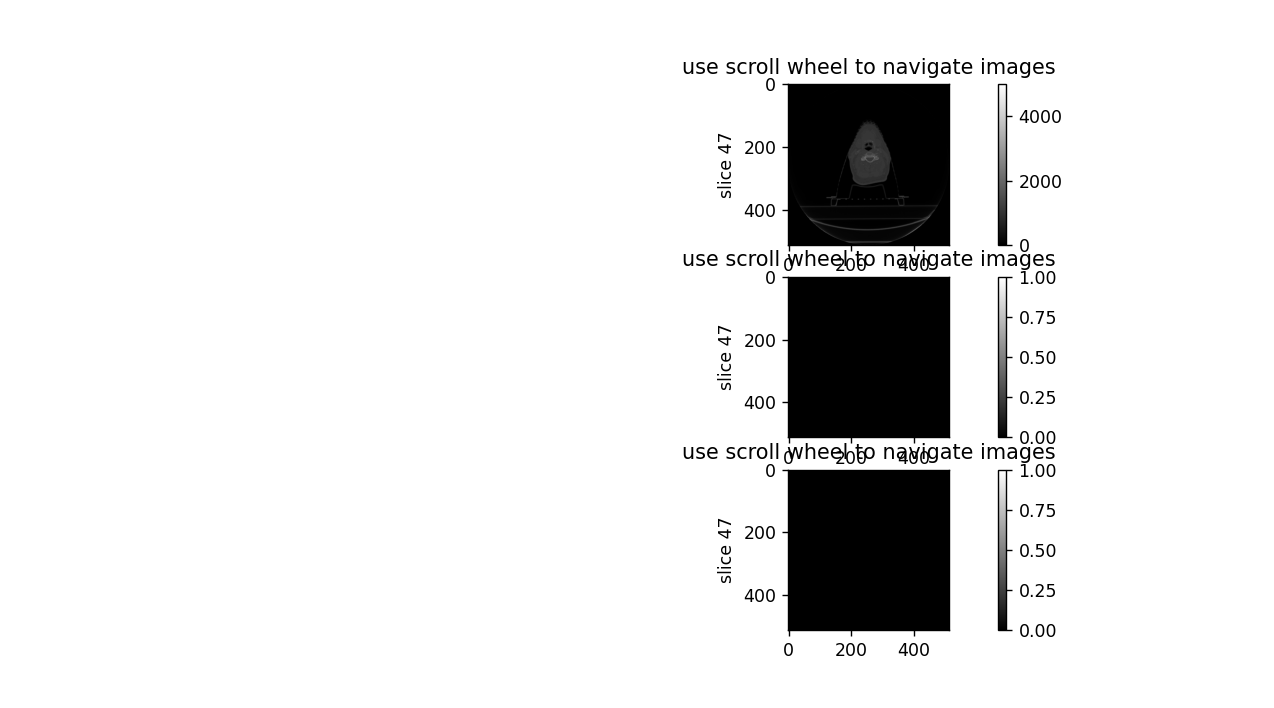

In [16]:
fig, (ax1, ax2, ax3)= plt.subplots(3, 1)
tracker1 = IndexTracker(ax1, curr1_data['image'], fig,0,5000)
fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)
tracker2 = IndexTracker(ax2, curr1_data['Parotid_R']['mask'], fig,0,1)
fig.canvas.mpl_connect('scroll_event', tracker2.onscroll)
tracker3 = IndexTracker(ax3, curr2_data['Parotid_R']['mask'], fig,0,1)
fig.canvas.mpl_connect('scroll_event', tracker3.onscroll)

plt.show()

In [13]:
# save all_data is too much work
def loop_all_patients_analysis(parent_path, standard_list):
    subdirs = [os.path.join(parent_path, o) for o in os.listdir(parent_path) if os.path.isdir(os.path.join(parent_path,o))]
    
    for path in subdirs:
        all_data = generate_mask(path)
        if not ('MedMind' in all_data.keys()) and ('Mirada' in all_data.keys()) and ('Physician' in all_data.keys()):
            print("patient ", path, "doesn't contains all data")
            continue
        RS_names = ['MedMind', 'Mirada', 'Physician']
        for RS_name in RS_names:
            all_data[RS_name] = Rename_fuzzy(all_data, RS_name, standard_list)
        
        
        del all_data
    
    return 

In [64]:
file_to_write = open("geo_ralation_40.pickle", "wb")
pickle.dump(geo_relation, file_to_write)

In [52]:
test=[1,2,3,4,5,6,7,np.nan,9,10]

In [55]:
np.mean(test)

nan

In [51]:
(np.array(test)>3) & (np.array(test)<=7)

array([False, False, False,  True,  True,  True,  True, False, False,
       False])

In [59]:
np.ones(5, dtype=bool)

array([ True,  True,  True,  True,  True])

In [81]:
np.asarray(a)
y=[0,1,0]
z = np.cross(x,y)

In [98]:
x=np.asarray(x)

In [100]:
x.all([1,0,1])

TypeError: 'list' object cannot be interpreted as an integer

In [104]:
(x == test).all()

<ipython-input-104-0b8e06631695>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (x == test).all()


AttributeError: 'bool' object has no attribute 'all'

In [109]:
test=[1 1 1]

SyntaxError: invalid syntax (<ipython-input-109-17c78507093d>, line 1)

In [121]:
vec =  [1,1,1]
dis = np.linalg.norm(vec)

In [122]:
dis

1.7320508075688772

In [123]:
vec = vec/dis

In [124]:
vec

array([0.57735027, 0.57735027, 0.57735027])

In [126]:
test = np.array([1,1,1])

In [129]:
(vec == test).all()

False

In [116]:
print(vec)

[1, 2, 3]


In [118]:
vec/3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [21]:
np.array(geo_relation.keys())

array(dict_keys(['Body', 'Parotid_R', 'Parotid_L', 'Bone_Mandible', 'Lips', 'Larnyx', 'Esophagus', 'Cochlea_R', 'Cochlea_L', 'Brainstem', 'Brain', 'Glottis', 'Lens_L', 'Lens_R', 'OpticChiasm', 'Musc_Constrict_I', 'Musc_Constrict_M', 'Musc_Constrict_S', 'Glnd_Submand_L', 'Glnd_Submand_R', 'SpinalCord', 'BrachialPlex_R', 'Brachialplexs', 'BrachialPlex_L', 'Eye_R', 'Eye_L', 'Temporal_R', 'Temporal_L', 'Larnx_SG', 'OpticNrv_L', 'OpticNrv_R', 'Musc_Constrict', 'Cavity_Oral', 'Nasopharynx', 'Glnd_Submands', 'Parotids', 'Glnd_Lacrimal_L', 'Glnd_Lacrimal_R', 'Temporal', 'Ear_Internal_R', 'OpticNrv', 'Arytenoid_R']),
      dtype=object)

In [29]:
list(geo_relation.keys())


['Body',
 'Parotid_R',
 'Parotid_L',
 'Bone_Mandible',
 'Lips',
 'Larnyx',
 'Esophagus',
 'Cochlea_R',
 'Cochlea_L',
 'Brainstem',
 'Brain',
 'Glottis',
 'Lens_L',
 'Lens_R',
 'OpticChiasm',
 'Musc_Constrict_I',
 'Musc_Constrict_M',
 'Musc_Constrict_S',
 'Glnd_Submand_L',
 'Glnd_Submand_R',
 'SpinalCord',
 'BrachialPlex_R',
 'Brachialplexs',
 'BrachialPlex_L',
 'Eye_R',
 'Eye_L',
 'Temporal_R',
 'Temporal_L',
 'Larnx_SG',
 'OpticNrv_L',
 'OpticNrv_R',
 'Musc_Constrict',
 'Cavity_Oral',
 'Nasopharynx',
 'Glnd_Submands',
 'Parotids',
 'Glnd_Lacrimal_L',
 'Glnd_Lacrimal_R',
 'Temporal',
 'Ear_Internal_R',
 'OpticNrv',
 'Arytenoid_R']

In [37]:
df = pd.DataFrame(columns=['A','B'])

In [38]:
df.loc['patient 1'] = ['check', 'Programmer']

In [39]:
df

,A,B
patient 1,check,Programmer


In [48]:
file_path ='HN_test/HN_P020'
rename_ct(file_path)

HN_test/HN_P020\1-001.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.203636882171353934037071058757.dcm
HN_test/HN_P020\1-002.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.489150783371540049841920407289.dcm
HN_test/HN_P020\1-003.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.205791089876622562521921797618.dcm
HN_test/HN_P020\1-004.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.686484236145706891763428243823.dcm
HN_test/HN_P020\1-005.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.307234892167430907981396892506.dcm
HN_test/HN_P020\1-006.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.820392527182172847611533525530.dcm
HN_test/HN_P020\1-007.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.340351739604450354837235209386.dcm
HN_test/HN_P020\1-008.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.254467831181528206611202373867.dcm
HN_test/HN_P020\1-009.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.103148038

HN_test/HN_P020\1-080.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.597699064248361221943698002271.dcm
HN_test/HN_P020\1-081.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.886066982297372685927288821373.dcm
HN_test/HN_P020\1-082.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.949235172384576910690335517977.dcm
HN_test/HN_P020\1-083.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.694101059545079915766322738162.dcm
HN_test/HN_P020\1-084.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.842887478774560551881224738639.dcm
HN_test/HN_P020\1-085.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.273781131534136204463965722937.dcm
HN_test/HN_P020\1-086.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.164070235755077252934917433498.dcm
HN_test/HN_P020\1-087.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.674736707276900004674729989566.dcm
HN_test/HN_P020\1-088.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.147135266

HN_test/HN_P020\1-163.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.179599030241670380576306092570.dcm
HN_test/HN_P020\1-164.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.226893482021110877848422808142.dcm
HN_test/HN_P020\1-165.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.260262742308954372771857954299.dcm
HN_test/HN_P020\1-166.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.923236557578302897165646316015.dcm
HN_test/HN_P020\1-167.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.211310149042013493226666033163.dcm
HN_test/HN_P020\1-168.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.323517774810134720347502807287.dcm
HN_test/HN_P020\1-169.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.147781630335720211907677584902.dcm
HN_test/HN_P020\1-170.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.122446337730687867682176848086.dcm
HN_test/HN_P020\1-171.dcm
HN_test/HN_P020\CT.1.3.6.1.4.1.14519.5.2.1.2193.7172.338189081

In [41]:
os.path.join(parent_path,'HN20039-01')

'HN\\HN20039-01'

In [43]:
rename_ct(file_path)

NameError: name 'geo_stats' is not defined

In [5]:
ge

,Body,Parotid_R,Parotid_L,Bone_Mandible,Lips,Larnyx,Esophagus,Cochlea_R,Cochlea_L,Brainstem,...,Nasopharynx,Glnd_Submands,Parotids,Glnd_Lacrimal_L,Glnd_Lacrimal_R,Temporal,Ear_Internal_R,OpticNrv,Arytenoid_R,Carotid
Body,23.0,23.0,23.0,23.0,12.0,16.0,13.0,17.0,16.0,23.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parotid_R,23.0,24.0,24.0,24.0,13.0,16.0,14.0,17.0,16.0,24.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Parotid_L,23.0,24.0,24.0,24.0,13.0,16.0,14.0,17.0,16.0,24.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Bone_Mandible,23.0,24.0,24.0,24.0,13.0,16.0,14.0,17.0,16.0,24.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Lips,12.0,13.0,13.0,13.0,13.0,10.0,13.0,8.0,7.0,13.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Larnyx,16.0,16.0,16.0,16.0,10.0,16.0,10.0,12.0,11.0,16.0,...,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Esophagus,13.0,14.0,14.0,14.0,13.0,10.0,14.0,9.0,8.0,14.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cochlea_R,17.0,17.0,17.0,17.0,8.0,12.0,9.0,17.0,16.0,17.0,...,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Cochlea_L,16.0,16.0,16.0,16.0,7.0,11.0,8.0,16.0,16.0,16.0,...,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0
Brainstem,23.0,24.0,24.0,24.0,13.0,16.0,14.0,17.0,16.0,24.0,...,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
cands = stats.index[0:27]

In [7]:
import math
total = 0
i = 0
for cand1 in cands:
    for cand2 in cands:
        if(cand2!=cand1 and  (not math.isnan(stats[cand1][cand2])) and stats[cand1][cand2]>5):
            total = total + stats[cand1][cand2]
            i = i+1

        
total = total*1.0/i

In [8]:
total

10.383838383838384

In [103]:
stats['Lens_L']['Lens_L']

4.0

In [81]:
test_path = "test_data" 
df_mistake=loop_test_patients(test_path, standard_list, geo_relation,geo_stat)
pd.set_option("display.max_rows", None, "display.max_columns", None)
display(df_mistake)

work on patient test_data\HN20039-21


C:\Users\ddu\Anaconda3\envs\MedicalMind\lib\site-packages\pydicom\charset.py:692: UserWarning: Unknown encoding 'Not Supplied' - using default encoding instead
  _warn_about_invalid_encoding(encoding)
C:\Users\ddu\Anaconda3\envs\MedicalMind\lib\site-packages\dicom_contour\contour.py:79: UserWarning: There are more than 3 contour files, double check!
  if n >3 : warnings.warn("There are more than 3 contour files, double check!")


work on RS structure  Physician +++++++++++++++++++++++++++
work on RS structure  Physician +++++++++++++++++++++++++++
pharynxconstrictor  -->  Musc_Constrict  score is  56
.CTVp  is  a target structure
.PTV60  is  a target structure
.PTV66  is  a target structure
.PTV_Mandible  is  a target structure
.PTV_RNeck1  is  a target structure
A_Carotid  -->  Carotid  score is  88
BODY  -->  Body  score is  100
BrachialPlexus_R  -->  BrachialPlex_R  score is  93
Brainstem  -->  Brainstem  score is  100
Cochlea_L  -->  Cochlea_L  score is  100
Cochlea_R  -->  Cochlea_R  score is  100
Epiglottis  -->  Glottis  score is  82
Esophagus  -->  Esophagus  score is  100
LARYNX  -->  Larnyx  score is  83
Lips  -->  Lips  score is  100
MANDIBLE  -->  Bone_Mandible  score is  76
OralCavity  -->  Cavity_Oral  score is  57
Parotid_L  -->  Parotid_L  score is  100
Parotid_R  -->  Parotid_R  score is  100
Musc_Constrictinf  -->  Musc_Constrict_I  score is  91
Musc_Constrictmid  -->  Musc_Constrict_M  score 

The geo stat range is [1.7412632973216522, 3.0481092765517355, 1.6384883956923348]  +-  [0.14530018518634016, 0.06810263526595053, 0.08391827410907636]
The target and ref1 direction  [1.617063407416183, 2.9871882745666105, 1.703926679530546]
The geo stat range is [1.596998723056217, 0.09449004888109942, 1.632395951707719]  +-  [0.15778550517868134, 0.06888085684112408, 0.08725705350002488]
The target and ref2 direction  [1.5975015860897146, 0.15727520139854412, 1.7167764225348843]
Start to work on organ Ring1 +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  60
The geo stat range is [1.2256922083405135, 2.766130073290682, 1.2265817837041764]  +-  [0.09496987866345218, 0.15994847184069955, 0.1716554152023928]
The target and ref1 direction  [2.4013833007303544, 2.537083701046919, 1.029836414895986]
The geo stat range is [1.1420129165043174, 0.3379011263319434, 1.25188476759235]  +-  [0.11647491368417744, 0.14796231123641954, 0.159410902704414]
The target and ref2 direct

The geo stat range is [2.042285261682444, 3.046289320965369, 1.505142090238203]  +-  [0.13709590299776903, 0.04596916697801242, 0.056605408169491465]
The target and ref1 direction  [1.866530682981097, 3.0276057584335576, 1.4649960568519098]
The geo stat range is [1.9194463297572164, 0.10653067985460012, 1.4871983968880869]  +-  [0.12749635159131203, 0.053109220731090936, 0.061801286670948176]
The target and ref2 direction  [1.9641835040261229, 0.12176305118060021, 1.4923468266669597]
Start to work on organ Musc_Constrictinf +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [2.1945133381020283, 2.9755951031842, 1.430544739445438]  +-  [0.13759862564162326, 0.06833349062039006, 0.06020015894780504]
The target and ref1 direction  [1.9686551892174364, 2.9918523228374934, 1.43555848698022]
The geo stat range is [2.058183537142958, 0.17809754212885476, 1.41241414201237]  +-  [0.11575280070076631, 0.07461502879298303, 0.06301221122375507]
The target 

The geo stat range is [1.8518185834377288, 2.9872721340326334, 1.7078203600977433]  +-  [0.13707619072896565, 0.08245480346112598, 0.07731739282983134]
The target and ref1 direction  [1.8424901071284596, 3.0994583254276535, 1.537145358140443]
The geo stat range is [1.7331432299606535, 0.15564647469513673, 1.7037828555211851]  +-  [0.13538023493694643, 0.08454154056989957, 0.07829882010134968]
The target and ref2 direction  [1.8507180466614734, 0.04405756498789478, 1.5290576647308773]
Start to work on organ Esophagus +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ FOM +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  29
the organ Bone is not in geo_relation libary
Start to work on organ Globe_L +++++++++++++++++++++++++++++++++++++++
The organ Globe_L  does not have initial stndard Name
Start to work on organ Globe_R +++++++++++++++++++++++++++++++++++++++
The organ Globe_R  does not have initial stndard Name
Start to work

The geo stat range is [1.675990545974814, 2.9707595549525894, 1.7179508053390202]  +-  [0.09999014520985289, 0.048228007611599066, 0.04811061608465511]
The target and ref1 direction  [2.2845197016283008, 2.910936654088665, 1.3700744971206458]
The geo stat range is [1.7660170727073135, 0.5399738470718419, 2.027364871811094]  +-  [0.05848819927995027, 0.10899912292781522, 0.10826290671189578]
The target and ref2 direction  [2.2755636761947517, 0.2303106754757436, 1.3640529327885882]
angle 2 y-axis out of range for reference organ 1
Start to work on organ Subglottis. +++++++++++++++++++++++++++++++++++++++
The organ Subglottis.  does not have initial stndard Name
Start to work on organ OpticNerve_L +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [1.1096464424416461, 2.6232847451436943, 2.0135487252997115]  +-  [0.12590298540676234, 0.07348531002714134, 0.027577828784719503]
The target and ref1 direction  [1.154125161674795, 2.702997372762378, 1

The geo stat range is [2.695937014373648, 2.1327490944224485, 0.7721704577860893]  +-  [0.3101090940411556, 0.4128617084944782, 0.3358668547689715]
The target and ref1 direction  [2.2240864939004124, 1.8831785175251043, 0.6397337952113776]
The geo stat range is [2.0478872170049662, 0.33850464431322624, 1.2684065514579173]  +-  [0.27558153073978653, 0.2022265973263702, 0.20380274619103966]
The target and ref2 direction  [2.432347593263538, 0.32183168851245003, 1.3005503670451373]
Start to work on organ Brain +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Brainstem_PRV +++++++++++++++++++++++++++++++++++++++
The organ Brainstem_PRV  does not have initial stndard Name
Start to work on organ Cochlea_L +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Cochlea_R +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Epiglottis ++++++++++++++++++++++++++++++++++

the available reference organs are  dict_keys(['Parotid_R', 'Parotid_L', 'Cochlea_L'])
Start to work on organ thyroid +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The organ Supraglottis  does not have initial stndard Name
Start to work on organ BODY +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ submandibular_r +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  62
The geo stat range is [1.8644318905214505, 2.5891204631540234, 2.0600999535579945]  +-  [0.1467977223363237, 0.1546724882533298, 0.15627632462418803]
The target and ref1 direction  [1.6411145775878528, 2.4753257358289487, 2.182709462162671]
The geo stat range is [1.5950074487859216, 0.1878304867565295, 1.735568115416605]  +-  [0.1181132210190747, 0.055709543186599916, 0.062145730334457264]
The target and ref2 direction  [1.703699974420879, 0.21912585967247183, 

The geo stat range is [2.108255702057056, 2.8829857435490283, 1.3476148763770104]  +-  [0.1721421594249318, 0.09468998453474378, 0.06932208701818839]
The target and ref1 direction  [1.8470009546893478, 2.9190870712200945, 1.3698001505145028]
The geo stat range is [2.718694580713783, 1.1873927488262312, 0.6387790107565515]  +-  [0.1155555238243233, 0.3142838260714223, 0.17521948565140955]
The target and ref2 direction  [2.7894570349220165, 1.0163963304263062, 0.6633047904752442]
Start to work on organ Artifact +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  0
The geo stat range is [1.222742827860293, 2.5066509218523434, 2.1291687101968138]  +-  [0.26619549525180825, 0.056510971384793475, 0.05624573033047178]
The target and ref1 direction  [2.694827597726552, 0.3903353801423141, 1.2074722188958331]
The geo stat range is [0.9497163469798563, 1.209442411759069, 2.5657022501402973]  +-  [0.26055501447639684, 0.05150179507245207, 0.1310525612843131]
The target and ref2 di

The geo stat range is [1.5896434100395787, 2.515939359605975, 2.1336019263687174]  +-  [0.23019640673768121, 0.05329850998425407, 0.07765999406305785]
The target and ref1 direction  [1.6505847224116188, 2.5642764759638785, 2.1301997678070874]
The geo stat range is [1.4978157284554214, 0.6293673672399784, 2.1299790981377247]  +-  [0.1867084320250618, 0.05898655225995199, 0.06926830303467944]
The target and ref2 direction  [1.39341074801516, 0.5679800775471535, 2.1214200269096817]
Start to work on organ Metal +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  62
the organ Retina_L is not in geo_relation libary
Start to work on organ OralCavity +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  57
The geo stat range is [1.4891909882105308, 2.3818174298849106, 2.2528139873677597]  +-  [0.2492122368160918, 0.06373824699551965, 0.10158755663651073]
The target and ref1 direction  [1.5963453993491987, 2.5108539788032767, 2.1814936697666276]
The geo stat range 

work on patient test_data\HN20039-27
work on RS structure  Physician +++++++++++++++++++++++++++
BODY  -->  Body  score is  100
..PTV70  is  a target structure
..PTV63  is  a target structure
..PTV56  is  a target structure
.GTVp  is  a target structure
.GTVn2  is  a target structure
.GTVn1  is  a target structure
.CTVp  is  a target structure
SpinalCord_PRV  -->  SpinalCord  score is  83
SpinalCord  -->  SpinalCord  score is  100
Ring  -->  Brain  score is  67
Musc_Constrictsup  -->  Musc_Constrict_S  score is  91
Musc_Constrictmid  -->  Musc_Constrict_M  score is  91
Musc_Constrictinf  -->  Musc_Constrict_I  score is  91
Parotid_R  -->  Parotid_R  score is  100
Parotid_L  -->  Parotid_L  score is  100
OralCavity  -->  Cavity_Oral  score is  57
Metal  -->  Retina_L  score is  62
Mandible  -->  Bone_Mandible  score is  76
Lips  -->  Lips  score is  100
Larynx  -->  Larnyx  score is  83
FOM  -->  Bone  score is  29
Esophagus  -->  Esophagus  score is  100
Cochlea_R  -->  Cochlea_R  scor

work on patient test_data\HN20039-28
work on RS structure  Physician +++++++++++++++++++++++++++
BODY  -->  Body  score is  100
Parotid_L  -->  Parotid_L  score is  100
OralCavity  -->  Cavity_Oral  score is  57
Metal  -->  Retina_L  score is  62
Mandible  -->  Bone_Mandible  score is  76
Lips  -->  Lips  score is  100
Supraglottis  -->  Glottis  score is  74
FOM  -->  Bone  score is  29
Esophagus  -->  Esophagus  score is  100
Epiglottis  -->  Glottis  score is  82
Brainstem_PRV  -->  Brainstem  score is  82
Brainstem  -->  Brainstem  score is  100
.PTV70p  is  a target structure
.PTV70n1  is  a target structure
.PTV63n-plan  is  a target structure
.PTV56p-plan  is  a target structure
.PTV56n_Plan  is  a target structure
.PTV56n  is  a target structure
.PTV56p  is  a target structure
.PTV_RNeck1  is  a target structure
.CTV56p  is  a target structure
.PTV63n  is  a target structure
.PTV_LNeck1  is  a target structure
.GTVp  is  a target structure
.GTVn  is  a target structure
.CTVp  i

The geo stat range is [2.1008091708047134, 3.035359558133117, 1.5841608088789703]  +-  [0.13195809244272882, 0.06950866136738701, 0.11648218761724065]
The target and ref1 direction  [2.2364461208442914, 3.0124894079173483, 1.455027403178501]
The geo stat range is [2.0169689116495775, 0.11279629780462583, 1.5731339076155515]  +-  [0.1776355824852971, 0.0777474666670713, 0.12765403313306495]
The target and ref2 direction  [1.930496269739514, 0.13909314758487473, 1.439058296009562]
Start to work on organ AVOID_ANT +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  50
The geo stat range is [2.4448451784304535, 2.7325401633848414, 1.200329752580205]  +-  [0.31010909404115566, 0.4128617084944782, 0.3358668547689715]
The target and ref1 direction  [2.025611974326129, 2.8556042803429285, 1.8382087300286307]
The geo stat range is [1.9188778273942444, 0.1354372476475164, 1.4547373422703935]  +-  [0.22189646525810464, 0.9841448343259568, 0.178435916400753]
The target and ref2 dir

The geo stat range is [2.1945133381020283, 2.9755951031842, 1.430544739445438]  +-  [0.13759862564162326, 0.06833349062039006, 0.06020015894780504]
The target and ref1 direction  [2.218893952404785, 2.948656649074053, 1.4011225796690663]
The geo stat range is [2.058183537142958, 0.17809754212885476, 1.41241414201237]  +-  [0.11575280070076631, 0.07461502879298303, 0.06301221122375507]
The target and ref2 direction  [1.8994850506347862, 0.19909364153431267, 1.3869143193744309]
Start to work on organ Musc_Constrictmid +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [2.042285261682444, 3.046289320965369, 1.505142090238203]  +-  [0.13709590299776903, 0.04596916697801242, 0.056605408169491465]
The target and ref1 direction  [2.0690204637960488, 3.0878289876709255, 1.5275488235404577]
The geo stat range is [1.9194463297572164, 0.10653067985460012, 1.4871983968880869]  +-  [0.12749635159131203, 0.053109220731090936, 0.061801286670948176]
The target

The geo stat range is [2.695937014373648, 2.1327490944224485, 0.7721704577860893]  +-  [0.3101090940411556, 0.4128617084944782, 0.3358668547689715]
The target and ref1 direction  [2.662776154290587, 1.9906230294712561, 1.0467061315256692]
The geo stat range is [2.0478872170049662, 0.33850464431322624, 1.2684065514579173]  +-  [0.27558153073978653, 0.2022265973263702, 0.20380274619103966]
The target and ref2 direction  [1.9843137589727113, 0.22250178591478656, 1.4565413787256947]
Start to work on organ BrachialPlexus_L +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  93
The geo stat range is [2.108255702057056, 2.8829857435490283, 1.3476148763770104]  +-  [0.1721421594249318, 0.09468998453474378, 0.06932208701818839]
The target and ref1 direction  [1.7742974074249875, 2.9703954896405627, 1.4715572056397717]
The geo stat range is [2.718694580713783, 1.1873927488262312, 0.6387790107565515]  +-  [0.1155555238243233, 0.3142838260714223, 0.17521948565140955]
The target and

The geo stat range is [1.5515973799837843, 3.12458878562307, 1.5735571080630257]  +-  [0.14530018518634008, 0.06810263526595053, 0.08391827410907642]
The target and ref1 direction  [2.427969461593552, 2.177493075962559, 1.1023398757067568]
The geo stat range is [1.5899978835132202, 0.017003867522436607, 1.5680195447989669]  +-  [0.1577855051786814, 0.06888085684112405, 0.08725705350002486]
The target and ref2 direction  [2.5007771934543053, 0.8653121062829798, 1.1473694863362898]
angle 1 y-axis out of range for reference organ 1 
Start to work on organ Avoid_Ant +++++++++++++++++++++++++++++++++++++++
The organ Avoid_Ant  does not have initial stndard Name
Start to work on organ Avoid-Mid +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  50
The geo stat range is [2.4448451784304535, 2.7325401633848414, 1.200329752580205]  +-  [0.31010909404115566, 0.4128617084944782, 0.3358668547689715]
The target and ref1 direction  [1.5633211423587965, 3.123235831722908, 1.555316451

The geo stat range is [1.1096464424416461, 2.6232847451436943, 2.0135487252997115]  +-  [0.12590298540676234, 0.07348531002714134, 0.027577828784719503]
The target and ref1 direction  [1.0626425369092343, 2.5835662251644873, 2.0731177613525364]
The geo stat range is [0.8495928736670144, 0.8795049606471343, 2.2924858178510057]  +-  [0.06525227222141118, 0.12299496784375405, 0.04545230943894914]
The target and ref2 direction  [0.8943750160570262, 1.0154532318275142, 2.438372894478307]
angle 2 y-axis out of range for reference organ 2
Start to work on organ OpticNerve_R +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  33
The geo stat range is [0.7381013711845738, 1.86872444558624, 2.489802564417961]  +-  [0.07185061806017916, 0.024517293591272683, 0.11497496804323469]
The target and ref1 direction  [0.8173615006552059, 2.1555070388721655, 2.4252044902796785]
The geo stat range is [1.0238948313769651, 0.7470259859086816, 2.160883819227824]  +-  [0.0790466466175655, 0.031

the available reference organs are  dict_keys(['Parotid_R', 'Parotid_L', 'Cochlea_L'])
Start to work on organ BODY +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  100
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  74
The geo stat range is [1.8518185834377288, 2.9872721340326334, 1.7078203600977433]  +-  [0.13707619072896565, 0.08245480346112598, 0.07731739282983134]
The target and ref1 direction  [1.949132576700401, 2.949737875176483, 1.7600908189135867]
The geo stat range is [1.7331432299606535, 0.15564647469513673, 1.7037828555211851]  +-  [0.13538023493694643, 0.08454154056989957, 0.07829882010134968]
The target and ref2 direction  [1.7717738227134818, 0.2162959938606085, 1.7857843705714846]
Start to work on organ SpinalCord +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  44
The geo stat range is [1.0962086753640645, 2.712203849600504, 1.934598499547977]  +-  [0.23019640673768121, 0.0532

The geo stat range is [1.5515973799837843, 3.12458878562307, 1.5735571080630257]  +-  [0.14530018518634008, 0.06810263526595053, 0.08391827410907642]
The target and ref1 direction  [1.7862672215195021, 2.329291439700058, 0.7664207954539423]
The geo stat range is [1.5899978835132202, 0.017003867522436607, 1.5680195447989669]  +-  [0.1577855051786814, 0.06888085684112405, 0.08725705350002486]
The target and ref2 direction  [1.653467308334311, 0.8706866208081265, 0.7105068903627105]
angle 1 y-axis out of range for reference organ 1 
Start to work on organ Parotid_R/PRV +++++++++++++++++++++++++++++++++++++++
The organ Parotid_R/PRV  does not have initial stndard Name
Start to work on organ Ring1 +++++++++++++++++++++++++++++++++++++++
The organ Ring1  does not have initial stndard Name
Start to work on organ Ring2 +++++++++++++++++++++++++++++++++++++++
The organ Ring2  does not have initial stndard Name
Start to work on organ Mandible/prv +++++++++++++++++++++++++++++++++++++++
The organ

The geo stat range is [2.042285261682444, 3.046289320965369, 1.505142090238203]  +-  [0.13709590299776903, 0.04596916697801242, 0.056605408169491465]
The target and ref1 direction  [2.023426822520152, 2.9795275071322336, 1.4175726227279803]
The geo stat range is [1.9194463297572164, 0.10653067985460012, 1.4871983968880869]  +-  [0.12749635159131203, 0.053109220731090936, 0.061801286670948176]
The target and ref2 direction  [2.077368253009413, 0.14424853442668215, 1.4416539541526008]
Start to work on organ Musc_Constrictsup +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [1.7412632973216522, 3.0481092765517355, 1.6384883956923348]  +-  [0.14530018518634016, 0.06810263526595053, 0.08391827410907636]
The target and ref1 direction  [1.5587782546686326, 3.036728274042722, 1.6634497770938428]
The geo stat range is [1.596998723056217, 0.09449004888109942, 1.632395951707719]  +-  [0.15778550517868134, 0.06888085684112408, 0.08725705350002488]
The ta

the available reference organs are  dict_keys([])
Start to work on organ OralCavity1 +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  55
the organ Cavity_Oral is not in geo_relation libary with reference organs
Start to work on organ Mandible1 +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  73
the organ Bone_Mandible is not in geo_relation libary with reference organs
Start to work on organ Lips1 +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  89
the organ Lips is not in geo_relation libary with reference organs
Start to work on organ Larynx1 +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  77
the organ Larnyx is not in geo_relation libary with reference organs
Start to work on organ FOM1 +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  27
the organ OpticChiasm is not in geo_relation libary with reference organs
Start to work on organ Esophagus1 +++++++++++++++++++++++++++++++++++++++
The n

the available reference organs are  dict_keys(['Parotid_R', 'Parotid_L'])
Start to work on organ Supraglottis +++++++++++++++++++++++++++++++++++++++
The organ Supraglottis  does not have initial stndard Name
Start to work on organ Subglottis +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  82
The geo stat range is [1.8518185834377288, 2.9872721340326334, 1.7078203600977433]  +-  [0.13707619072896565, 0.08245480346112598, 0.07731739282983134]
The target and ref1 direction  [2.1397744461545933, 3.1207948490907165, 1.558077019321006]
The geo stat range is [1.7331432299606535, 0.15564647469513673, 1.7037828555211851]  +-  [0.13538023493694643, 0.08454154056989957, 0.07829882010134968]
The target and ref2 direction  [2.0684555977381684, 0.02088039474350888, 1.5547924135239501]
Start to work on organ SpinalCord_PRV +++++++++++++++++++++++++++++++++++++++
The organ SpinalCord_PRV  does not have initial stndard Name
Start to work on organ SpinalCord ++++++++++++++++++++++++

work on patient test_data\HN20039-36
work on RS structure  Physician +++++++++++++++++++++++++++
work on RS structure  Physician +++++++++++++++++++++++++++
..pPTV56  is  a target structure
..pPTV70  is  a target structure
..PTV56  is  a target structure
..PTV70  is  a target structure
..PTV70 mandible  is  a target structure
.CTV56Combined  is  a target structure
.CTV56Lt  is  a target structure
.CTV56p  is  a target structure
.CTVp70  is  a target structure
.CTVRt56  is  a target structure
.GTVnCombined  is  a target structure
.GTVnLt  is  a target structure
.GTVnRt  is  a target structure
.GTVp  is  a target structure
.PTV70n  is  a target structure
.PTV70p  is  a target structure
Ant Push  -->  Parotids  score is  38
Artifact  -->  Retinas  score is  53
avoid1  -->  Carotid  score is  62
BODY  -->  Body  score is  100
Brain  -->  Brain  score is  100
Brainstem  -->  Brainstem  score is  100
Cochlea_L  -->  Cochlea_L  score is  100
Cochlea_R  -->  Cochlea_R  score is  100
Ear_Extern

The geo stat range is [2.1945133381020283, 2.9755951031842, 1.430544739445438]  +-  [0.13759862564162326, 0.06833349062039006, 0.06020015894780504]
The target and ref1 direction  [2.0186574684807224, 3.0827720046345246, 1.5443598226040667]
The geo stat range is [2.058183537142958, 0.17809754212885476, 1.41241414201237]  +-  [0.11575280070076631, 0.07461502879298303, 0.06301221122375507]
The target and ref2 direction  [1.9295061279323842, 0.07020629107499575, 1.5016536982947732]
Start to work on organ Musc_Constrictinf_eval +++++++++++++++++++++++++++++++++++++++
The organ Musc_Constrictinf_eval  does not have initial stndard Name
Start to work on organ Musc_Constrictmid +++++++++++++++++++++++++++++++++++++++
The name mathcing score is  91
The geo stat range is [2.042285261682444, 3.046289320965369, 1.505142090238203]  +-  [0.13709590299776903, 0.04596916697801242, 0.056605408169491465]
The target and ref1 direction  [1.9134118118079881, 3.111061946107778, 1.5942076022466047]
The geo s

,patient,orignal name,matched name,LD score,random assign?
1,HN20039-21,Cochlea_L,Glottis*,12,Yes
2,HN20039-21,Musc_Constrictinf,OpticNrv_R*,21,Yes
3,HN20039-21,Ring1,Brain*,36,No
4,HN20039-22,Ring,Brain*,40,No
5,HN20039-22,Metal,Retina_L*,43,No
6,HN20039-22,Larynx,Temporal_L*,12,Yes
7,HN20039-22,Artifact,Retinas*,38,No
8,HN20039-22,.egPC_mid1,Ethmoid*,33,No
9,HN20039-23,Artifact,Retinas*,38,No
10,HN20039-23,Metal,Retina_L*,43,No


,patient,orignal name,matched name,LD score,random assign?
1,HN20039-21,Cochlea_L,Glottis*,12,Yes
2,HN20039-21,Musc_Constrictinf,OpticNrv_R*,21,Yes
3,HN20039-21,Ring1,Brain*,36,No
4,HN20039-22,Ring,Brain*,40,No
5,HN20039-22,Metal,Retina_L*,43,No
6,HN20039-22,Larynx,Temporal_L*,12,Yes
7,HN20039-22,Artifact,Retinas*,38,No
8,HN20039-22,.egPC_mid1,Ethmoid*,33,No
9,HN20039-23,Artifact,Retinas*,38,No
10,HN20039-23,Metal,Retina_L*,43,No


In [140]:
import random
random.randint(0, 5)

5

In [29]:
list(geo_stat.keys())

['Body',
 'Parotid_R',
 'Parotid_L',
 'Bone_Mandible',
 'Lips',
 'Larnyx',
 'Esophagus',
 'Cochlea_R',
 'Cochlea_L',
 'Brainstem',
 'Brain',
 'Glottis',
 'Lens_L',
 'Lens_R',
 'OpticChiasm',
 'Musc_Constrict_I',
 'Musc_Constrict_M',
 'Musc_Constrict_S',
 'Glnd_Submand_L',
 'Glnd_Submand_R',
 'SpinalCord',
 'BrachialPlex_R',
 'Brachialplexs',
 'BrachialPlex_L',
 'Eye_R',
 'Eye_L',
 'Temporal_R',
 'Temporal_L',
 'Larnx_SG',
 'OpticNrv_L',
 'OpticNrv_R',
 'Musc_Constrict',
 'Cavity_Oral',
 'Nasopharynx',
 'Glnd_Submands',
 'Parotids',
 'Glnd_Lacrimal_L',
 'Glnd_Lacrimal_R',
 'Temporal',
 'Ear_Internal_R',
 'OpticNrv',
 'Arytenoid_R',
 'Carotid']

In [18]:
test[len(test)]='da'

IndexError: list assignment index out of range

In [50]:
fuzz.token_sort_ratio("PAROTID L", "Parotid_L")

78

In [57]:
fuzz.ratio("parotid r", "parotids")

82

In [44]:
cand = process.extractOne("PAROTID L", standard_list, scorer=fuzz.token_sort_ratio)

In [45]:
cand

('Parotids', 82)

In [46]:
standard_list

['Tongue_Base',
 'Tongue_Oral',
 'Trachea',
 'Bone',
 'SpinalCord',
 'Scar',
 'Retinas',
 'Retina_R',
 'Retina_L',
 'Lens_R',
 'Lens_L',
 'Parotid_R',
 'Parotid_L',
 'Parotids',
 'OpticNrv_R',
 'OpticNrv_L',
 'OpticNrv',
 'OpticChiasm',
 'Musc_Constrict_S',
 'Musc_Constrict_M',
 'Musc_Constrict_I',
 'Musc_Constrict',
 'Lungs',
 'Lips',
 'Larnx_SG',
 'Larnyx',
 'Glnd_Submands',
 'Glnd_Submand_L',
 'Glnd_Submand_R',
 'Eyes',
 'Eye_R',
 'Eye_L',
 'Esophagus',
 'Ear_Internal_R',
 'Ear_Internal_L',
 'Cochlea_R',
 'Cochlea_L',
 'Cochlea',
 'Brainstem',
 'Brain',
 'Brachialplexs',
 'BrachialPlex_R',
 'BrachialPlex_L',
 'Bone_Mandible',
 'Body',
 'Mouth_Floor',
 'Cavity_Oral',
 'Pitutary',
 'Thyroid',
 'Carotid',
 'Carotid_L',
 'Carotid_R',
 'Arytenoid',
 'Arytenoid_L',
 'Arytenoid_R',
 'Ethmoid',
 'Occipital',
 'Parietal_L',
 'Parietal_R',
 'Parietal',
 'Sphenoid',
 'Temporal',
 'Temporal_L',
 'Temporal_R',
 'Cavity_Nasal',
 'Cerebrum',
 'Cerebrum_L',
 'Cerebrum_R',
 'Glnd_Lacrimal',
 'Glnd_L

In [59]:
standard_list

['tongue_base',
 'tongue_oral',
 'trachea',
 'bone',
 'spinalcord',
 'scar',
 'retinas',
 'retina_r',
 'retina_l',
 'lens_r',
 'lens_l',
 'parotid_r',
 'parotid_l',
 'parotids',
 'opticnrv_r',
 'opticnrv_l',
 'opticnrv',
 'opticchiasm',
 'musc_constrict_s',
 'musc_constrict_m',
 'musc_constrict_i',
 'musc_constrict',
 'lungs',
 'lips',
 'larnx_sg',
 'larnyx',
 'glnd_submands',
 'glnd_submand_l',
 'glnd_submand_r',
 'eyes',
 'eye_r',
 'eye_l',
 'esophagus',
 'ear_internal_r',
 'ear_internal_l',
 'cochlea_r',
 'cochlea_l',
 'cochlea',
 'brainstem',
 'brain',
 'brachialplexs',
 'brachialplex_r',
 'brachialplex_l',
 'bone_mandible',
 'body',
 'mouth_floor',
 'cavity_oral',
 'pitutary',
 'thyroid',
 'carotid',
 'carotid_l',
 'carotid_r',
 'arytenoid',
 'arytenoid_l',
 'arytenoid_r',
 'ethmoid',
 'occipital',
 'parietal_l',
 'parietal_r',
 'parietal',
 'sphenoid',
 'temporal',
 'temporal_l',
 'temporal_r',
 'cavity_nasal',
 'cerebrum',
 'cerebrum_l',
 'cerebrum_r',
 'glnd_lacrimal',
 'glnd_l

In [69]:
standard_list

['tongue_base',
 'tongue_oral',
 'trachea',
 'bone',
 'spinalcord',
 'scar',
 'retinas',
 'retina_r',
 'retina_l',
 'lens_r',
 'lens_l',
 'parotid_r',
 'parotid_l',
 'parotids',
 'opticnrv_r',
 'opticnrv_l',
 'opticnrv',
 'opticchiasm',
 'musc_constrict_s',
 'musc_constrict_m',
 'musc_constrict_i',
 'musc_constrict',
 'lungs',
 'lips',
 'larnx_sg',
 'larnyx',
 'glnd_submands',
 'glnd_submand_l',
 'glnd_submand_r',
 'eyes',
 'eye_r',
 'eye_l',
 'esophagus',
 'ear_internal_r',
 'ear_internal_l',
 'cochlea_r',
 'cochlea_l',
 'cochlea',
 'brainstem',
 'brain',
 'brachialplexs',
 'brachialplex_r',
 'brachialplex_l',
 'bone_mandible',
 'body',
 'mouth_floor',
 'cavity_oral',
 'pitutary',
 'thyroid',
 'carotid',
 'carotid_l',
 'carotid_r',
 'arytenoid',
 'arytenoid_l',
 'arytenoid_r',
 'ethmoid',
 'occipital',
 'parietal_l',
 'parietal_r',
 'parietal',
 'sphenoid',
 'temporal',
 'temporal_l',
 'temporal_r',
 'cavity_nasal',
 'cerebrum',
 'cerebrum_l',
 'cerebrum_r',
 'glnd_lacrimal',
 'glnd_l

In [73]:
standard_list
print(standard_list)
test = standard_list.copy()
test[1] = 'a'
print(standard_list)

['a', 'Tongue_Oral', 'Trachea', 'Bone', 'SpinalCord', 'Scar', 'Retinas', 'Retina_R', 'Retina_L', 'Lens_R', 'Lens_L', 'Parotid_R', 'Parotid_L', 'Parotids', 'OpticNrv_R', 'OpticNrv_L', 'OpticNrv', 'OpticChiasm', 'Musc_Constrict_S', 'Musc_Constrict_M', 'Musc_Constrict_I', 'Musc_Constrict', 'Lungs', 'Lips', 'Larnx_SG', 'Larnyx', 'Glnd_Submands', 'Glnd_Submand_L', 'Glnd_Submand_R', 'Eyes', 'Eye_R', 'Eye_L', 'Esophagus', 'Ear_Internal_R', 'Ear_Internal_L', 'Cochlea_R', 'Cochlea_L', 'Cochlea', 'Brainstem', 'Brain', 'Brachialplexs', 'BrachialPlex_R', 'BrachialPlex_L', 'Bone_Mandible', 'Body', 'Mouth_Floor', 'Cavity_Oral', 'Pitutary', 'Thyroid', 'Carotid', 'Carotid_L', 'Carotid_R', 'Arytenoid', 'Arytenoid_L', 'Arytenoid_R', 'Ethmoid', 'Occipital', 'Parietal_L', 'Parietal_R', 'Parietal', 'Sphenoid', 'Temporal', 'Temporal_L', 'Temporal_R', 'Cavity_Nasal', 'Cerebrum', 'Cerebrum_L', 'Cerebrum_R', 'Glnd_Lacrimal', 'Glnd_Lacrimal_L', 'Glnd_Lacrimal_R', 'Glottis', 'Nasopharynx']
['a', 'Tongue_Oral', '